# Test case: Census income data
### by: Nataliia Deshko

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

Let's load data and rename columns so that we can see their actual meaning:

In [2]:
df_train = pd.read_csv('data/census_income_learn.csv', header=None, skipinitialspace=True)
df_test = pd.read_csv('data/census_income_test.csv', header=None, skipinitialspace=True)

columns = list(pd.read_csv('data/census_income_columns.csv', header=None).values.flatten())
df_train.columns = columns
df_test.columns = columns

print('Train shape: ', df_train.shape)
print('Test shape: ', df_test.shape)

Train shape:  (199523, 42)
Test shape:  (99762, 42)


In [3]:
df_train.head(5)

,age (continuous),class of worker (nominal),detailed industry recode (nominal),detailed occupation recode (nominal),education (nominal),wage per hour (continuous),enroll in edu inst last wk (nominal),marital stat (nominal),major industry code (nominal),major occupation code (nominal),...,country of birth father (nominal),country of birth mother (nominal),country of birth self (nominal),citizenship (nominal),own business or self employed (nominal),fill inc questionnaire for veteran's admin (nominal),veterans benefits (nominal),weeks worked in year (continuous),year (nominal),income level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


### Target variable

Let's look at our targer variable we will have to predict and the percentages of instances of each class we have for training:

In [3]:
target_col = 'income level'

df_train[target_col].value_counts()

- 50000.    187141
50000+.      12382
Name: income level, dtype: int64

In [5]:
df_train[target_col].value_counts() / len(df_train)

- 50000.    0.937942
50000+.     0.062058
Name: income level, dtype: float64

In [6]:
df_test[target_col].value_counts() / len(df_test)

- 50000.    0.937992
50000+.     0.062008
Name: income level, dtype: float64

- We have 2 classes - we will solve binary classification task.
- We can see from here that data is highly imbalanced - we have 93% and 6% of '-50k' and '+50k' classes respectively. And classes are same imbalanced in both train and test set.

# Missing values

In [4]:
print('Train set : '+str(df_train.isna().sum()[df_train.isna().sum()>0]))
print('Test set : '+str(df_test.isna().sum()[df_test.isna().sum()>0]))

Train set : hispanic origin (nominal)    874
dtype: int64
Test set : hispanic origin (nominal)    405
dtype: int64


In [5]:
print('Replacing missing values by the value "Do not know" ...')

df_train['hispanic origin (nominal)'] = df_train['hispanic origin (nominal)'].fillna('Do not know')
print('Missing values in the train set : '+str(df_train['hispanic origin (nominal)'].isna().sum()))
df_test['hispanic origin (nominal)'] = df_test['hispanic origin (nominal)'].fillna('Do not know')
print('Missing values in the test set : '+str(df_test['hispanic origin (nominal)'].isna().sum()))

Replacing missing values by the value "Do not know" ...
Missing values in the train set : 0
Missing values in the test set : 0


In addition to missing values in the data we also have '?'. Let's for now replace it by NaN and inspect the variables where it apprears.

In [6]:
df_train = df_train.replace('?', np.NaN)
df_test = df_test.replace('?', np.NaN)

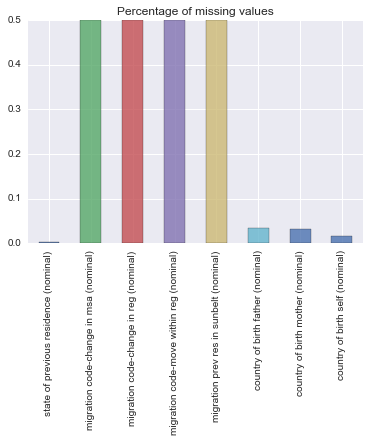

In [7]:
(df_train.isna().sum()[df_train.isna().sum()>0] / df_train.shape[0] ).plot(kind='bar', alpha=0.8)
plt.title('Percentage of missing values');

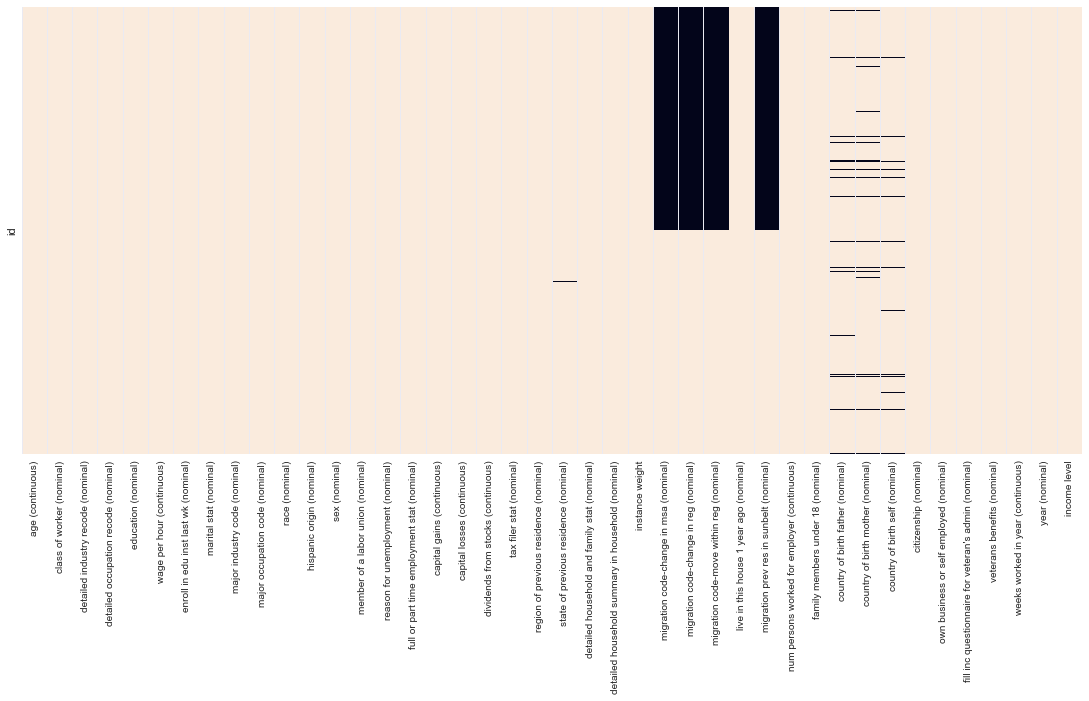

In [8]:
df_train_null = df_train.notnull().astype('int').sort_values('migration code-change in msa (nominal)')
fig, ax = plt.subplots(figsize=(19, 8))
sns.heatmap(df_train_null, ax=ax, cbar=False)
plt.ylabel('id')
plt.yticks([]);

- We can see that missing values for migration variables appear for the same people, which probably means that for some people this feature might be not applicable. Let's replace this values by "Not in universe" to be able to treat them in the same way as the rest of values. I propose same treatment for "state of previous residence" variable, and for "country of birth" variable we can put the label "Unknown" for the missing values (so that we do not have NaNs for further analysis).

In [7]:
df_train.loc[:,'country of birth father (nominal)'] = df_train['country of birth father (nominal)'].fillna('Unknown')
df_train.loc[:,'country of birth mother (nominal)'] = df_train['country of birth father (nominal)'].fillna('Unknown')
df_train.loc[:,'country of birth self (nominal)'] = df_train['country of birth father (nominal)'].fillna('Unknown')

df_test.loc[:,'country of birth father (nominal)'] = df_test['country of birth father (nominal)'].fillna('Unknown')
df_test.loc[:,'country of birth mother (nominal)'] = df_test['country of birth father (nominal)'].fillna('Unknown')
df_test.loc[:,'country of birth self (nominal)'] = df_test['country of birth father (nominal)'].fillna('Unknown')

In [8]:
df_train = df_train.fillna('Not in universe')
df_test = df_test.fillna('Not in universe')

Now when we have a bit cleaner data, let's inspect the variables present in data.

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age (continuous)                                        199523 non-null int64
class of worker (nominal)                               199523 non-null object
detailed industry recode (nominal)                      199523 non-null int64
detailed occupation recode (nominal)                    199523 non-null int64
education (nominal)                                     199523 non-null object
wage per hour (continuous)                              199523 non-null int64
enroll in edu inst last wk (nominal)                    199523 non-null object
marital stat (nominal)                                  199523 non-null object
major industry code (nominal)                           199523 non-null object
major occupation code (nominal)                         199523 non-null object
race (nominal)                                          199523 non-null object
hispanic origin (nominal

- We see from here that there are a lot of categorical variables (those which are of type "object") in our data which will require specific approach.

First, let's select continuous and nominal variables into 2 lists so that we could proceed with different approaches.

In [9]:
columns_continuous = [col for col in columns if 'continuous' in col]
columns_continuous_and_target = columns_continuous + [target_col]

columns_nominal = [col for col in columns if 'nominal' in col]
columns_nominal_and_target = columns_nominal + [target_col]

- In order to continue working with data we have to transform nominal variables into categories:

In [10]:
for col in columns_nominal_and_target:
    df_train.loc[:,col] = df_train[col].astype('category')
    df_test.loc[:,col] = df_test[col].astype('category')

In [15]:
df_train[columns_continuous].describe()

,age (continuous),wage per hour (continuous),capital gains (continuous),capital losses (continuous),dividends from stocks (continuous),num persons worked for employer (continuous),weeks worked in year (continuous)
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,52.000000


We see that some variables are skewed.

In [16]:
df_train[columns_nominal_and_target].describe()

,class of worker (nominal),detailed industry recode (nominal),detailed occupation recode (nominal),education (nominal),enroll in edu inst last wk (nominal),marital stat (nominal),major industry code (nominal),major occupation code (nominal),race (nominal),hispanic origin (nominal),...,family members under 18 (nominal),country of birth father (nominal),country of birth mother (nominal),country of birth self (nominal),citizenship (nominal),own business or self employed (nominal),fill inc questionnaire for veteran's admin (nominal),veterans benefits (nominal),year (nominal),income level
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,52,47,17,3,7,24,15,5,9,...,5,43,43,43,5,3,3,3,2,2
top,Not in universe,0,0,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,- 50000.
freq,100245,100684,100684,48407,186943,86485,100684,100684,167365,171907,...,144232,159163,159163,159163,176992,180672,197539,150130,99827,187141


- For few features there a significant number of categories and we will have to take into account when we will build a classification model. Specifically, in order to use categorical variables we will have to turn them into numerical ones, the most appropriate approach here on my opinion will be to use one-hot encoding. It implies having high dimensionality as soon as number of columns will be equal to the sum of numbers of all categories.

- For convenience of working with the dataset, let's transform our target variable into boolean type: '-50000' will become '0' class and '+50000' will become '1' class.

In [ ]:
df_train.iloc[:,-1] = df_train[target_col].cat.rename_categories([0, 1]) 
df_test.iloc[:,-1] = df_test[target_col].cat.rename_categories([0, 1]) 

# Distribution of variables
## - continuous

In the following plot we can see variable distribitions in the diagonal and interactions between variables around it.

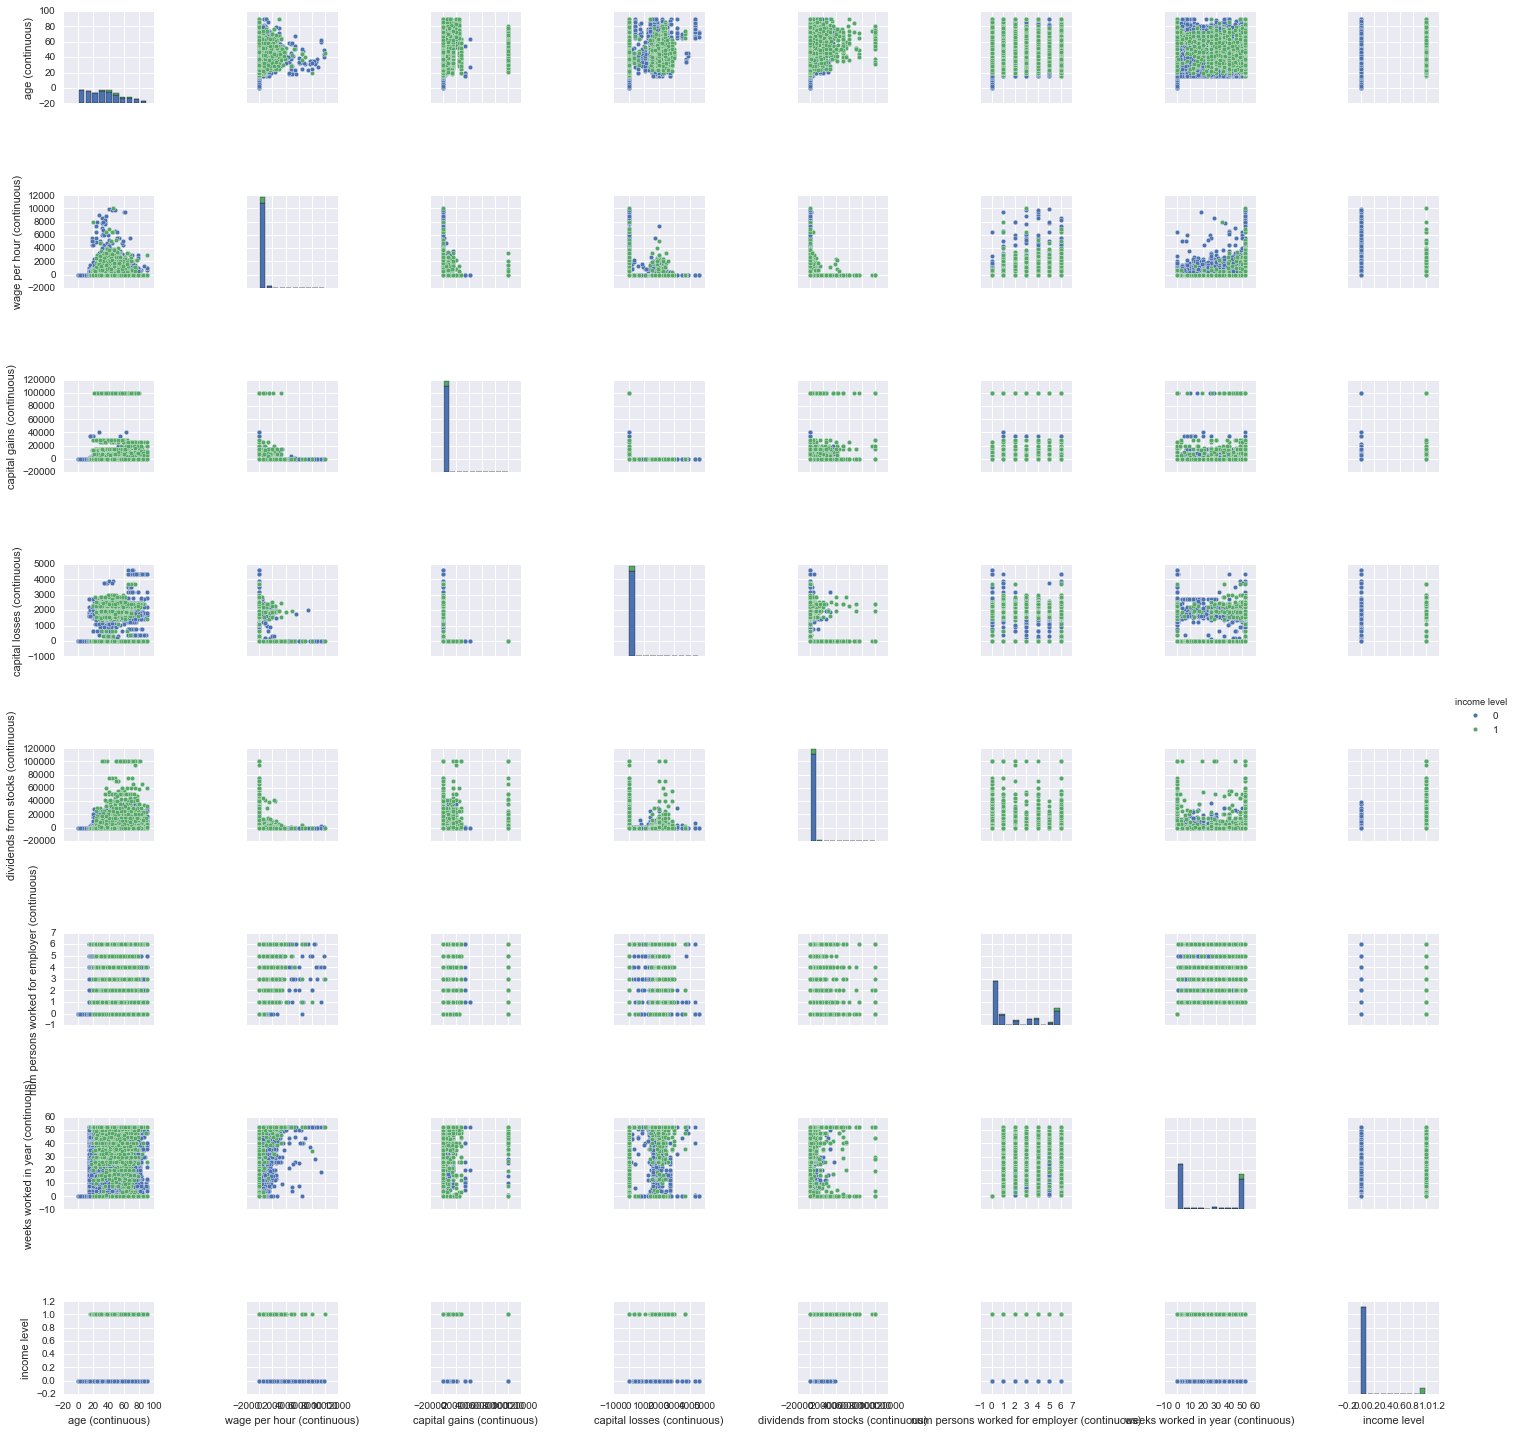

In [20]:
sns.pairplot(df_train[columns_continuous_and_target], hue=target_col, size=2.5);

It is hard to make conclusions from this figure - any pair of variables does not visually separate '-50k' and '+50k' classes, and distributions need more precise exploration.

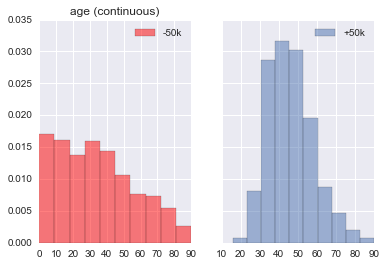

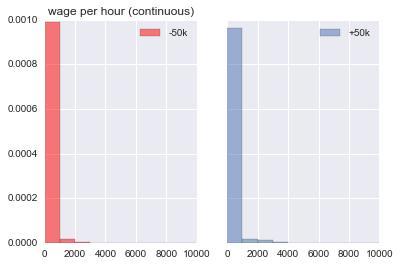

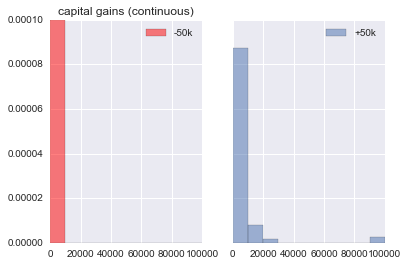

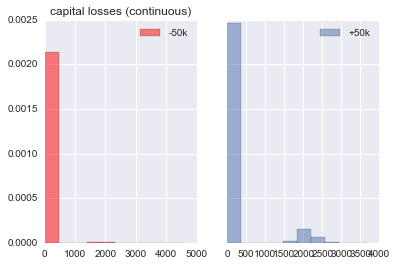

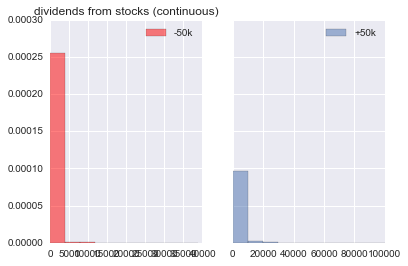

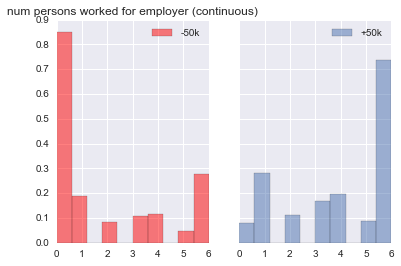

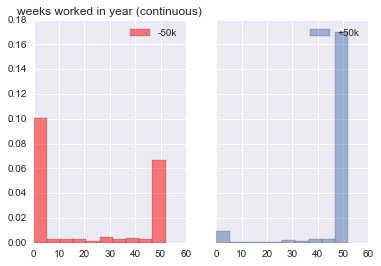

In [21]:
for col in columns_continuous:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    df_train[df_train['income level']==0][col].hist(ax=ax1, density=True, alpha=0.5, label='-50k', color='red')
    ax1.set_title(col)
    df_train[df_train['income level']==1][col].hist(ax=ax2, density=True, alpha=0.5, label='+50k')
    ax1.legend()
    ax2.legend()
    plt.show();

The most interesting figures from these are the ones on which distribution is different for the 2 considered classes.

Age, capital gains and losses, dividends, number of employeees and weeks worked show different distribution for 0 and 1 classes, and it means that they might be useful for our classification task. 

Let's plot the share of values between instances of 0 and 1 class for each value for each continious variable. Here red area will represent instances of class "-50k" and a green one - for "+50k" class.

Remark: In order to see variation in the '+50k' class more precisely, the plot is zoomed by cutting of the values lower than 60%.

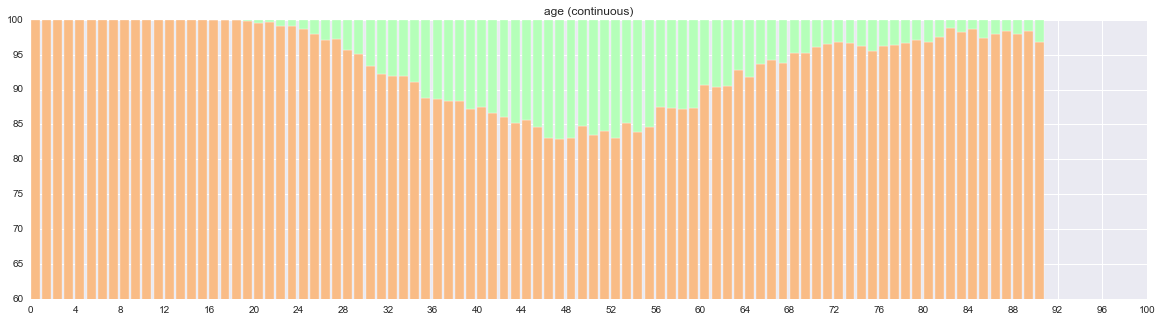

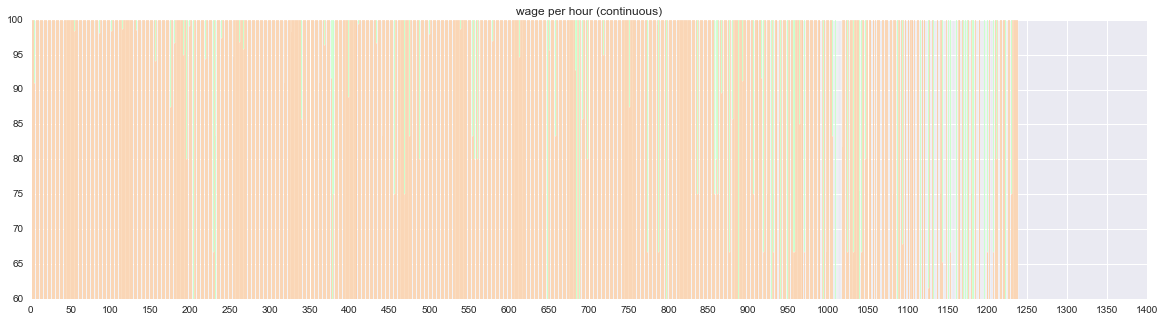

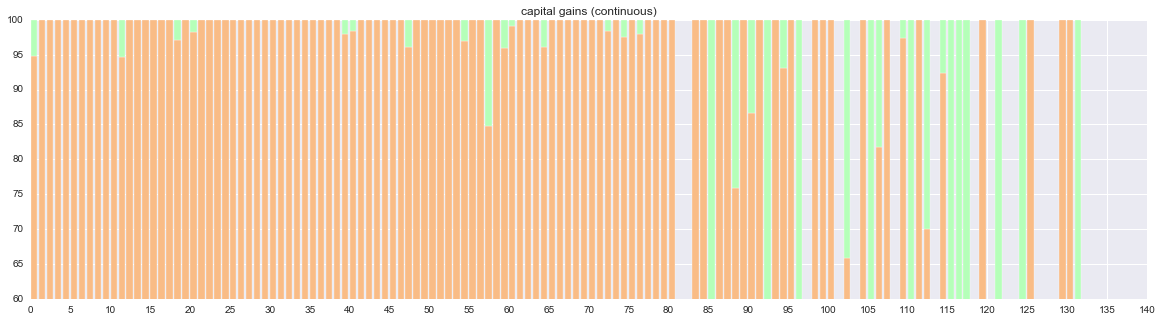

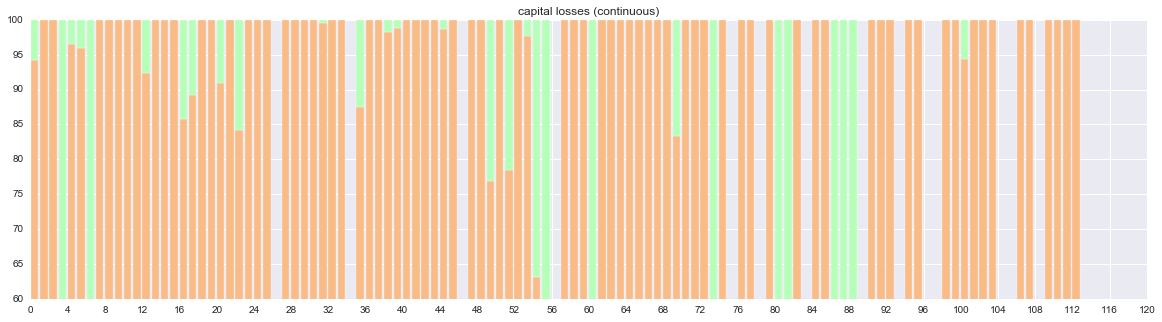

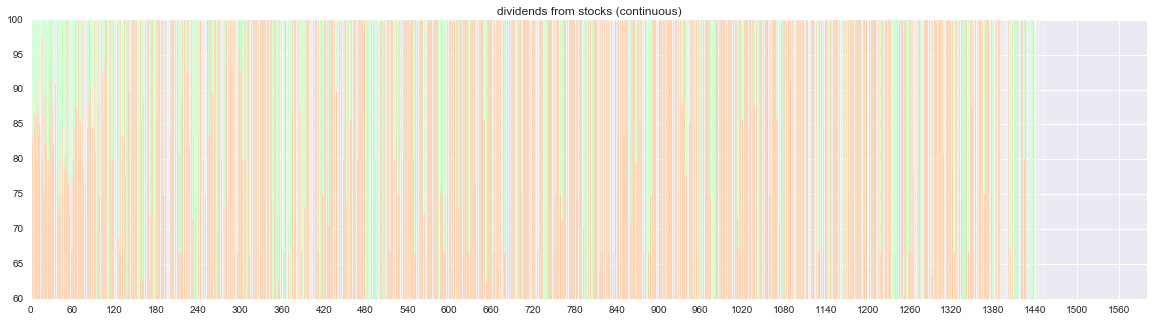

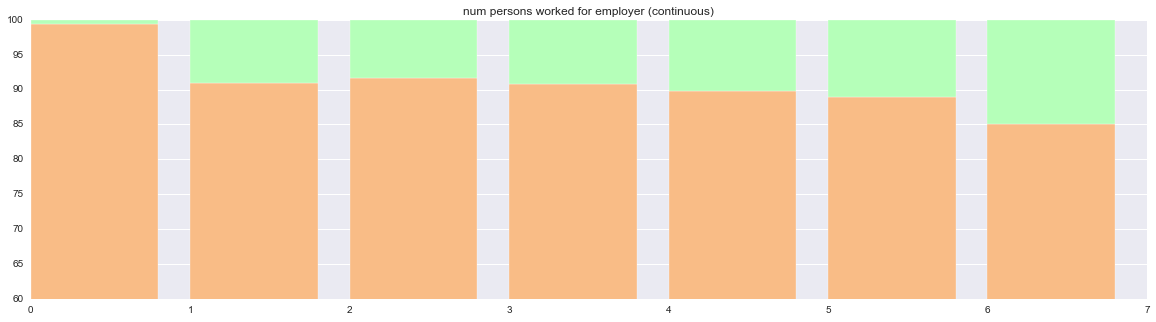

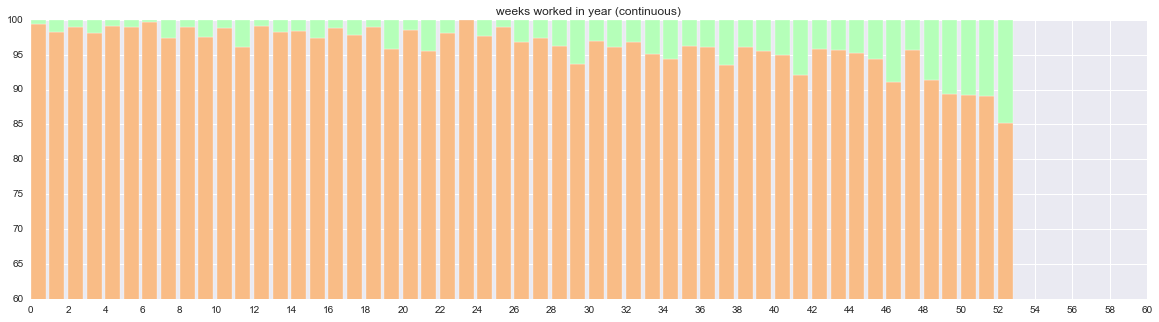

In [22]:
for col in columns_continuous:    
    df_train[col] = df_train[col].astype('category')

    stack_df_train = df_train[[target_col, col]].dropna().groupby([target_col, col]).size().unstack() #transform(lambda x: x.size() / x.count())
    stack_df_train_norm = stack_df_train.apply(lambda x:x/x.sum()*100, axis=0)

    names = list(stack_df_train_norm.columns)
    level_count = len(names)
    r = list(range(0,level_count))
    plt.figure(figsize=(20,5))
    ax = plt.subplot()
    ax.bar(r, stack_df_train_norm.iloc[0,:], color='#f9bc86', edgecolor='white', label='-50k') #, width=barWidth)
    ax.bar(r, stack_df_train_norm.iloc[1,:], bottom=stack_df_train_norm.iloc[0,:], color='#b5ffb9', edgecolor='white', label='+50k') #, width=barWidth)
    if level_count>20:
        ax.get_xaxis().set_major_locator(plt.MaxNLocator(30))
    plt.ylim(ymin=60)
    plt.title(col)
    plt.show()
    
    df_train[col] = df_train[col].astype(int);

Some insights:
- from here we can see that there are few rich people among very young or very old.
- people with higher income are more probable to have higher capital gains
- there are quite a lot of rich people among those with low dividends from stocks
- expected, with higher number of employees and with more weeks worked in a year, probability of having a bigger income is growing.

## - nominal variables

Here we will take a look at 2 different features representations. First one will present distribution of categories for each feature and separate them for the classes (not raw frequencies but in percentages (=normalized frequencies, normalized by frequency of the class) because of very imbalanced classes). Thus sum of probabilities in each class sum up to 100%

If the distribution of a variable for 1 and 0 classes has different shapes it means that this variable is interesting for predictions as soon as it will help to distinguish between the classes.

For better vizualization, 'Not in universe' categories are dropped here.

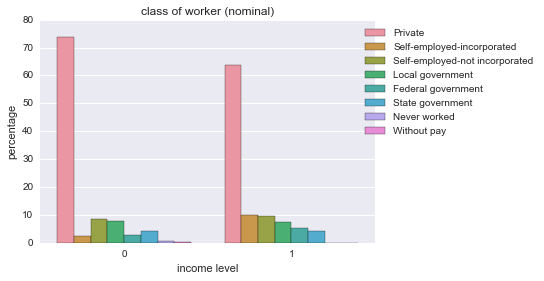

detailed industry recode (nominal) skipped, too many categories
detailed occupation recode (nominal) skipped, too many categories


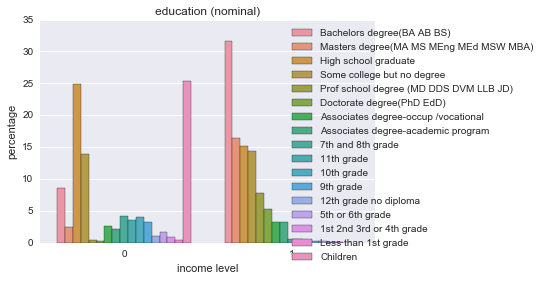

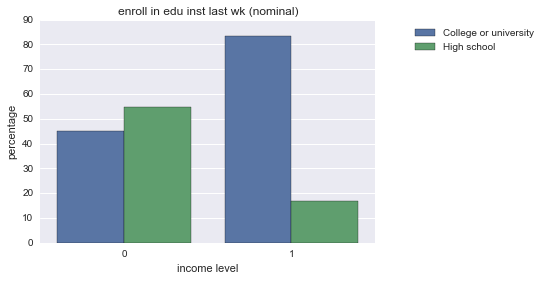

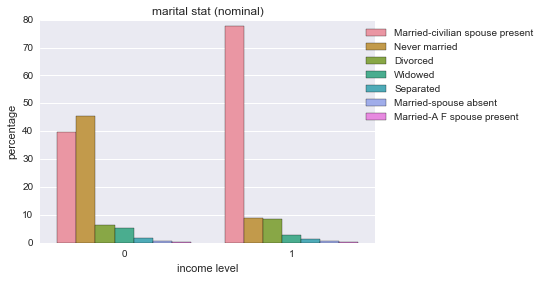

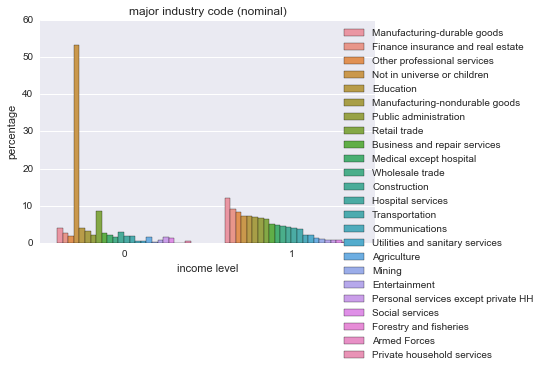

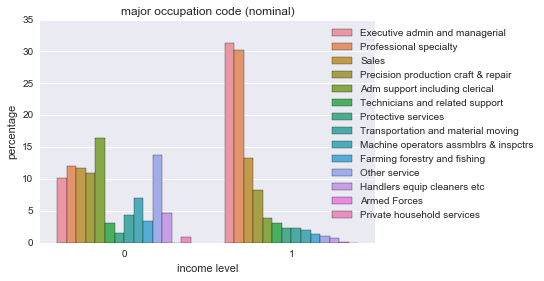

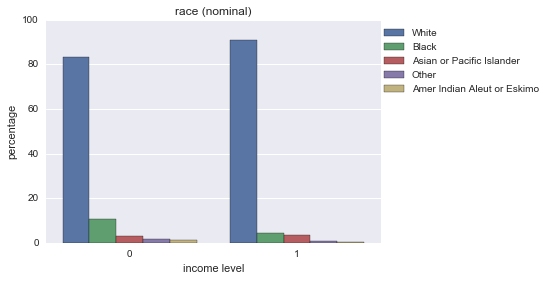

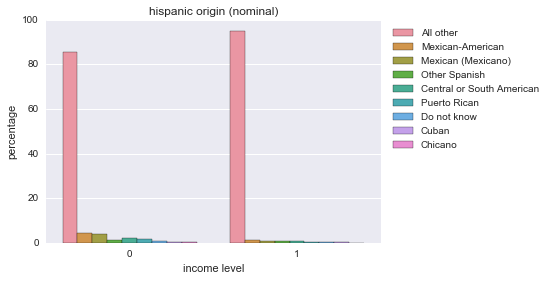

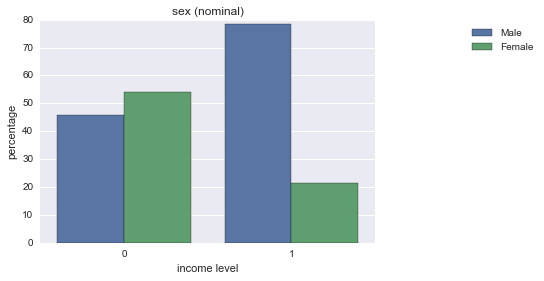

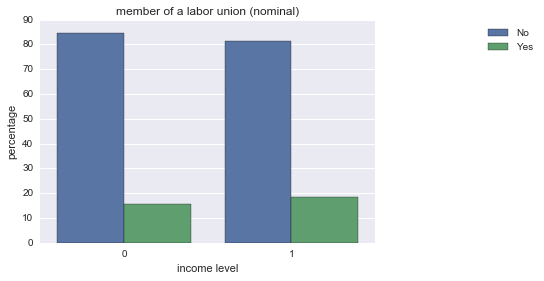

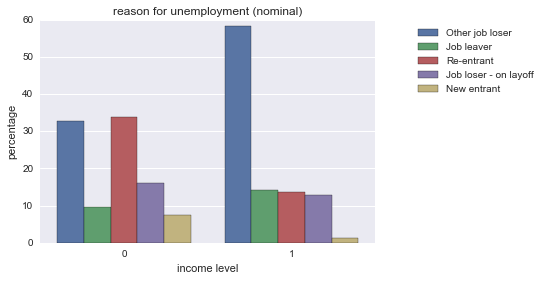

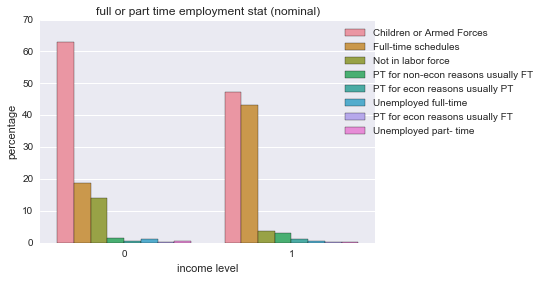

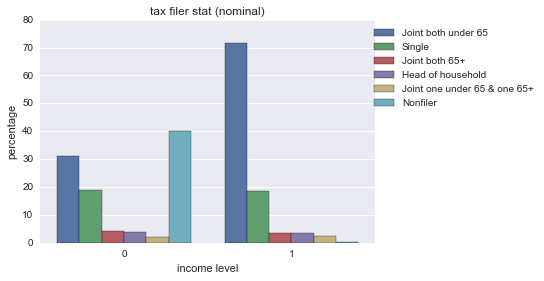

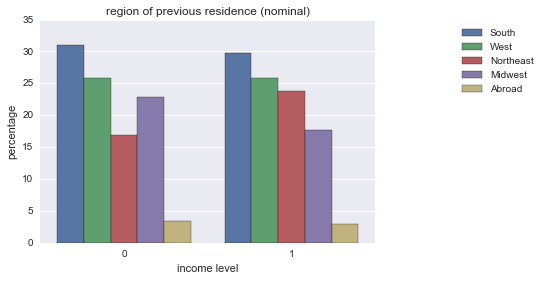

state of previous residence (nominal) skipped, too many categories
detailed household and family stat (nominal) skipped, too many categories


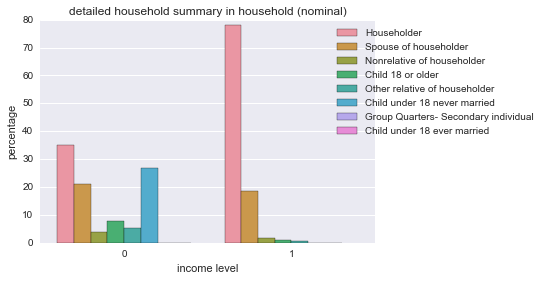

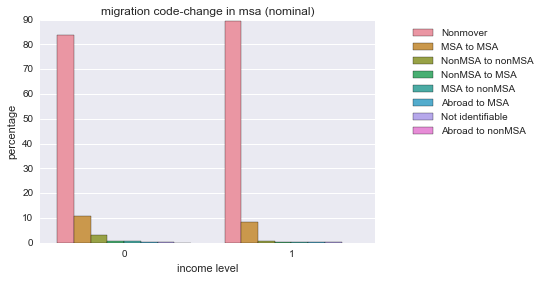

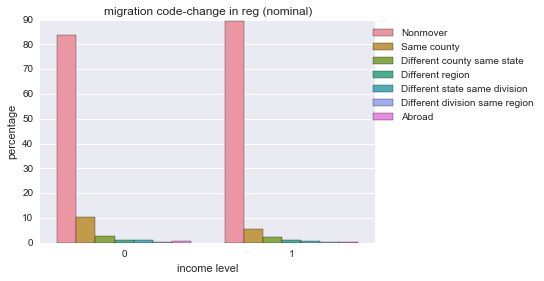

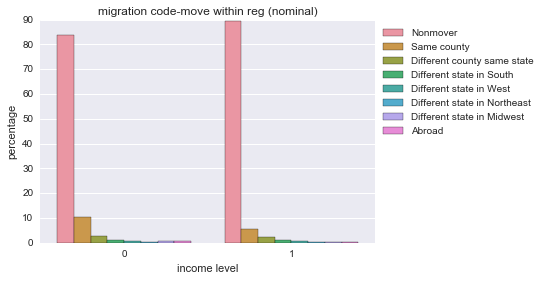

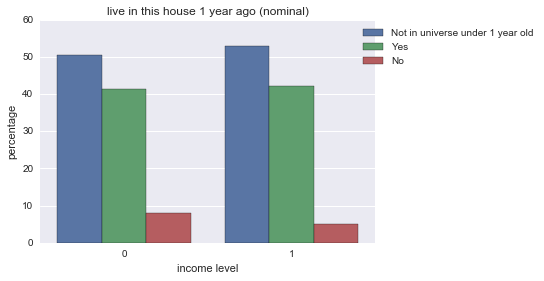

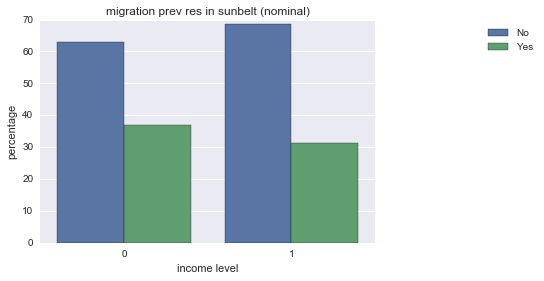

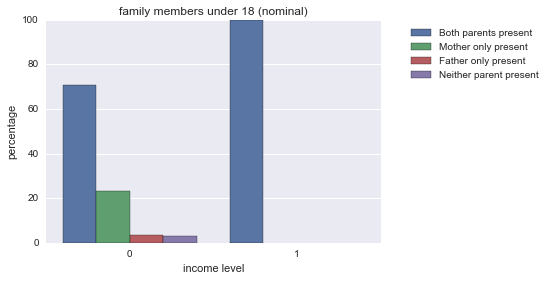

country of birth father (nominal) skipped, too many categories
country of birth mother (nominal) skipped, too many categories
country of birth self (nominal) skipped, too many categories


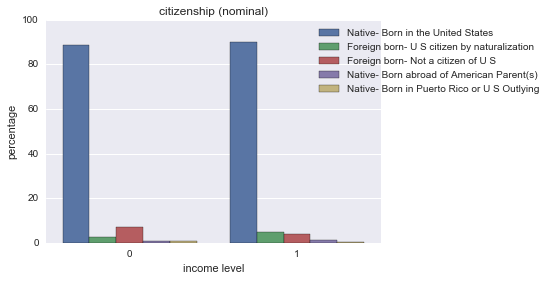

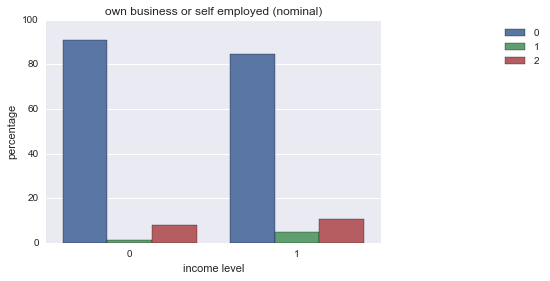

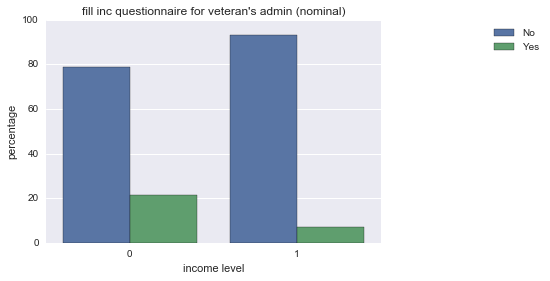

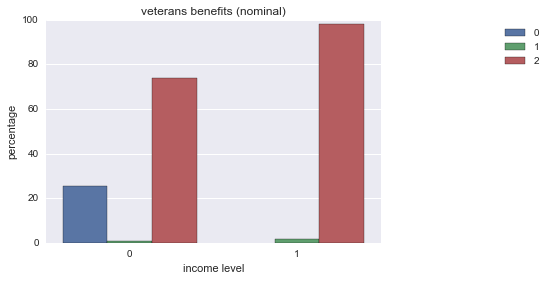

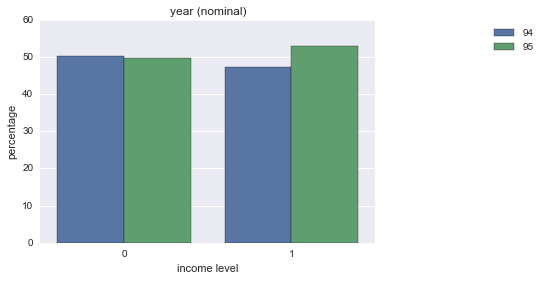

In [23]:
for col in columns_nominal:
    if col=='income level':
        continue
    percentage = df_train.replace('Not in universe',np.NaN).groupby(['income level'])[col].value_counts(normalize=True)
    
    if len(percentage.index.levels[1])>30:
        print(col+' skipped, too many categories')
        continue
    
    percentage = percentage.rename('percentage').mul(100).reset_index()\
                         .sort_values(['income level','percentage'],ascending=False )
 
    p = sns.barplot(hue=col,y="percentage", x="income level", data=percentage)
    plt.title(col)
    plt.legend(bbox_to_anchor=(1.5, 1))
    plt.show();

Some insights:
- 25% of those who earn less 50k are children
- among those who earn more 50k majority works privately (class of worker)
- richest people are executives/managers and people with professional specialty
- obviously, greatest majority of class '+50k' are not enrolled in the university or school (only 25 and 5 people are enrolled respectively)
- most of well-earning people are married
- more than 50 percent of '-50k' class representatives are not applicable to have "major industry code" are are children. considering that 25 percent are children, we see that 25 percent of adults are not applicable to have major industry code.

There are other nice ways of categorical features visualization, for example this one considering "num persons worked for employer (continuous)" and "class of worker (nominal)" features:

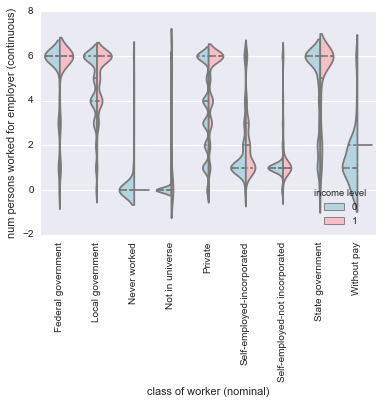

In [24]:
with sns.axes_style(style=None):
    sns.violinplot(x="class of worker (nominal)", y="num persons worked for employer (continuous)", hue="income level", data=df_train,
                   split=True, inner="quartile",palette=["lightblue", "lightpink"])
    plt.xticks(rotation=90);

From this example we see that for most classes number of employees doesn't really influence of the income. Only for not working people and people without pay part of "+50k" class is absent while for others distributions seem to be quite symmetrical.

### Significance of variables

I propose one more approach to visualization of categorical features distribution of our dataset. It focuses on how the instance's belonging to to a certain category rises its chances to be of class "+50k" (as soon as we have binary classification task, it's enough to look at only one class).

For each feature, we calculate the ratio of "+50k" instances in the category (number of "+50k" items from each category normalized it by frequency of category). Then we compute how much this percentage differs from percentage of a "+50k" class (to be more precise, by how much we have to increase ratio of "+50k" elements to get the ratio of "+50k" instances in this exact category).

Let's call this values a "significance" of the categories. We will use them a bit later for feature engineering.

Below there are significances displayed for nominal categories. Obviously, categories which have very high/low values (different and far from 0) are the most influencive and thus are the most interesting for us (in terms of amount of imformation they bring).

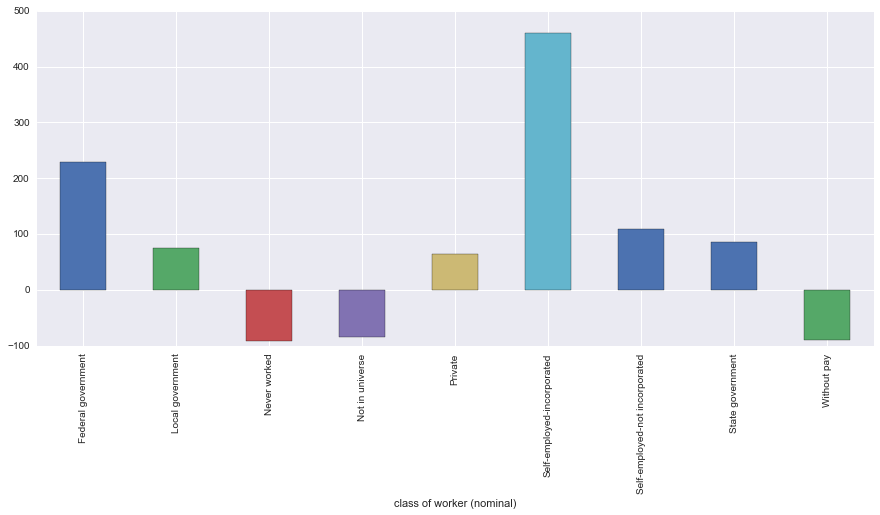

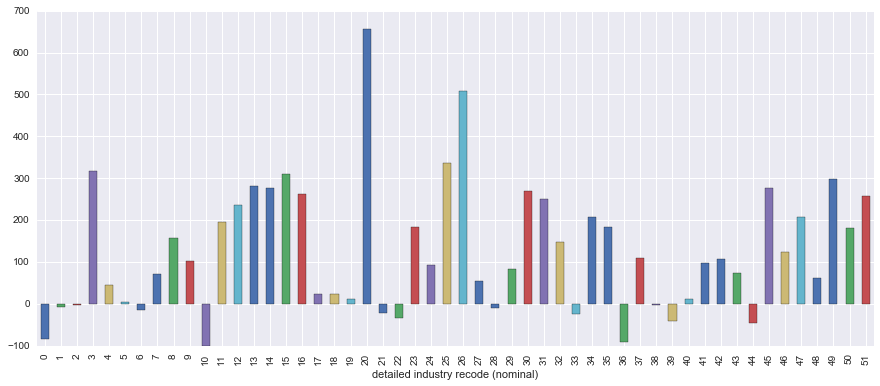

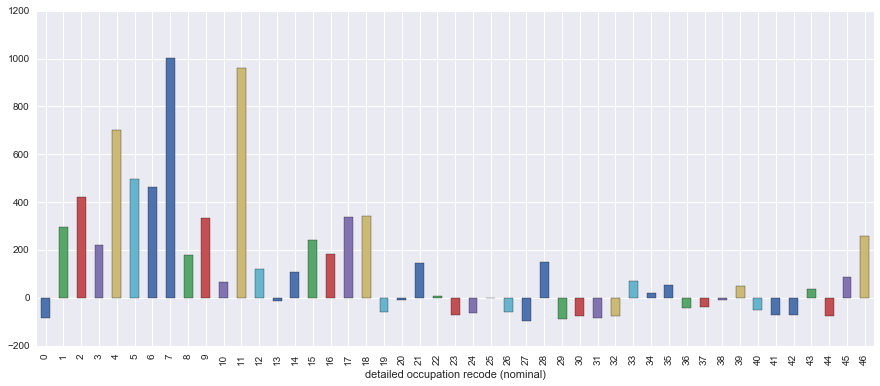

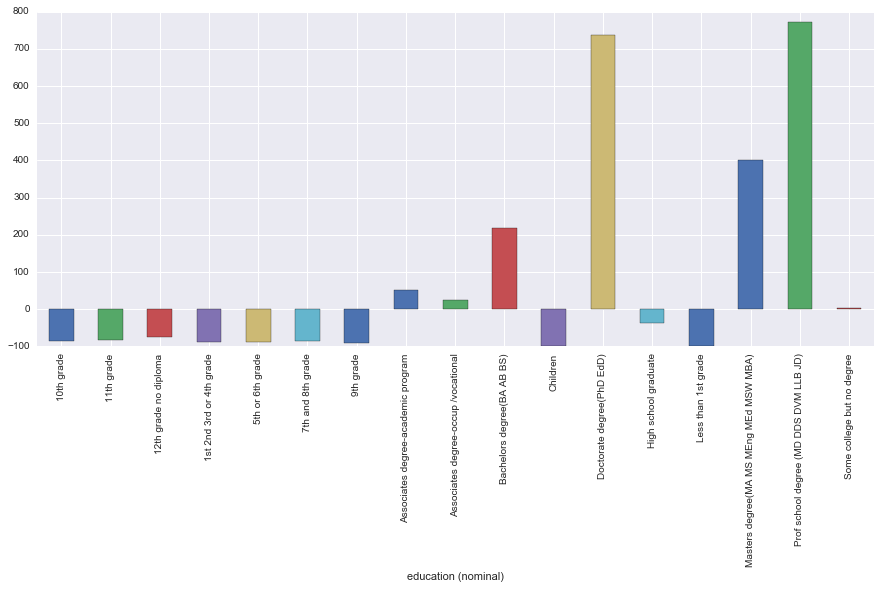

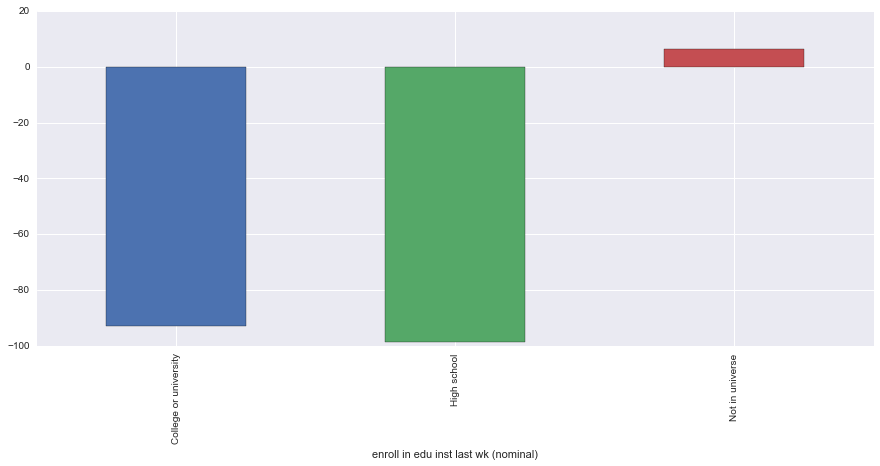

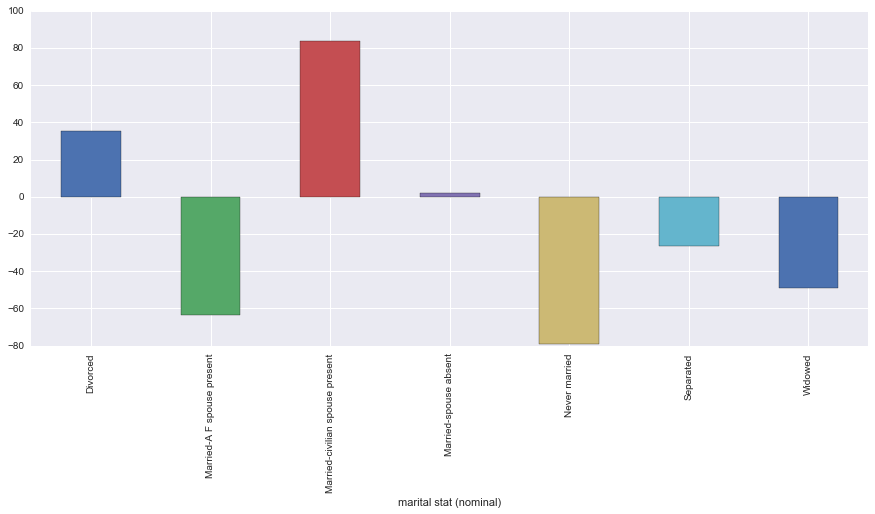

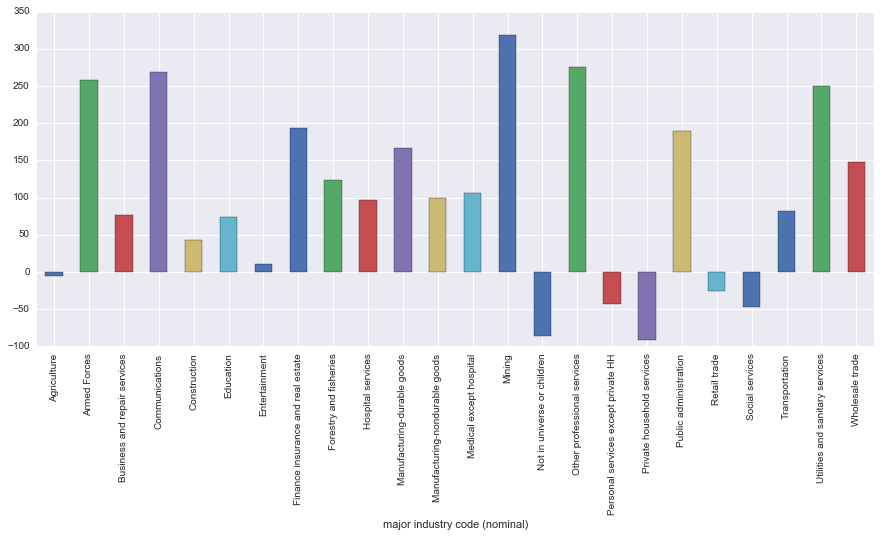

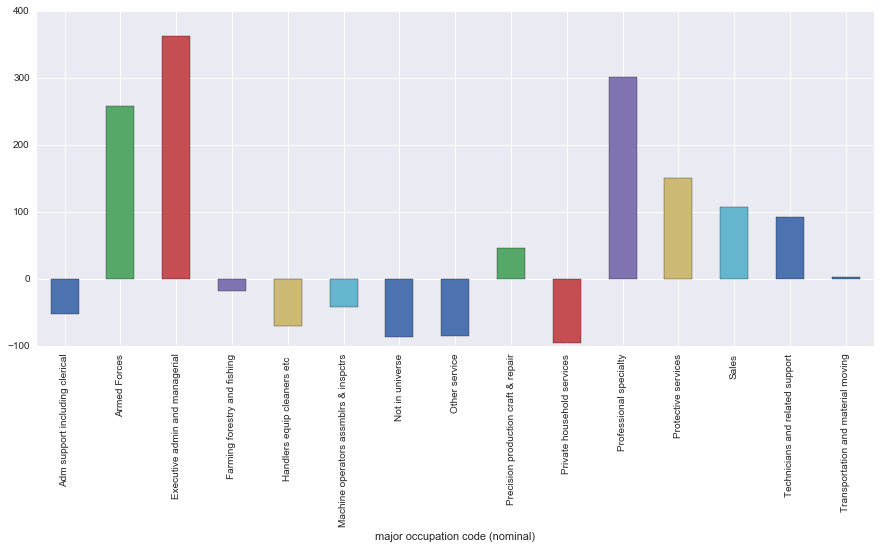

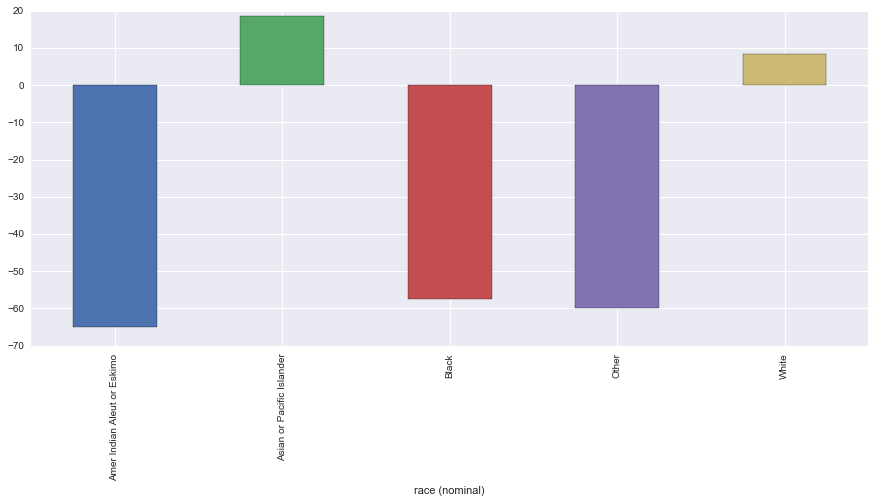

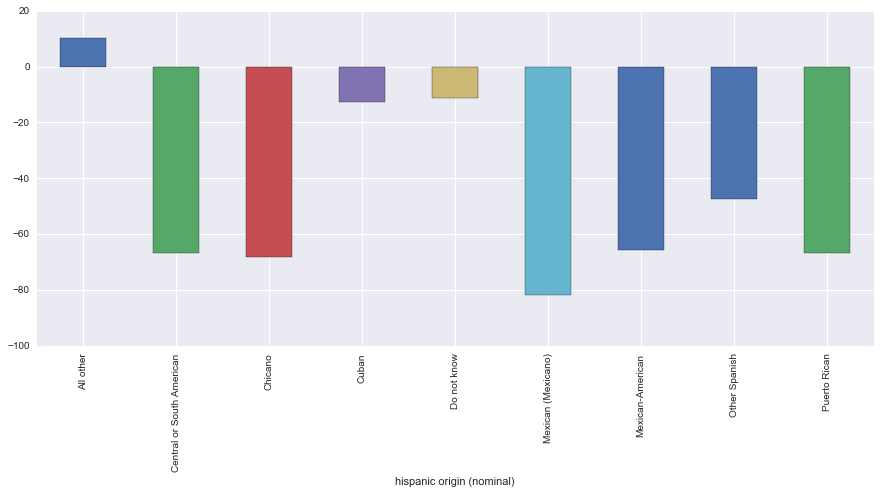

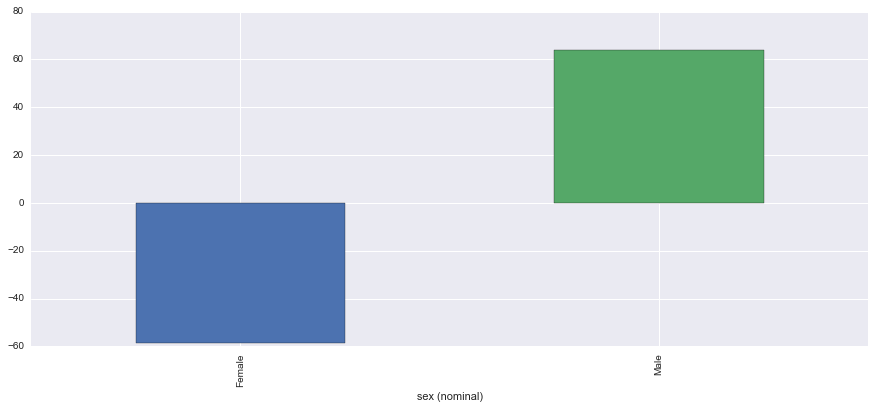

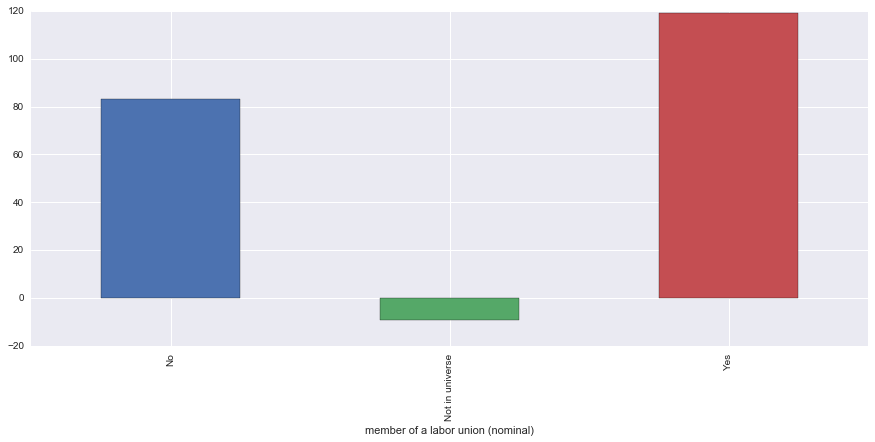

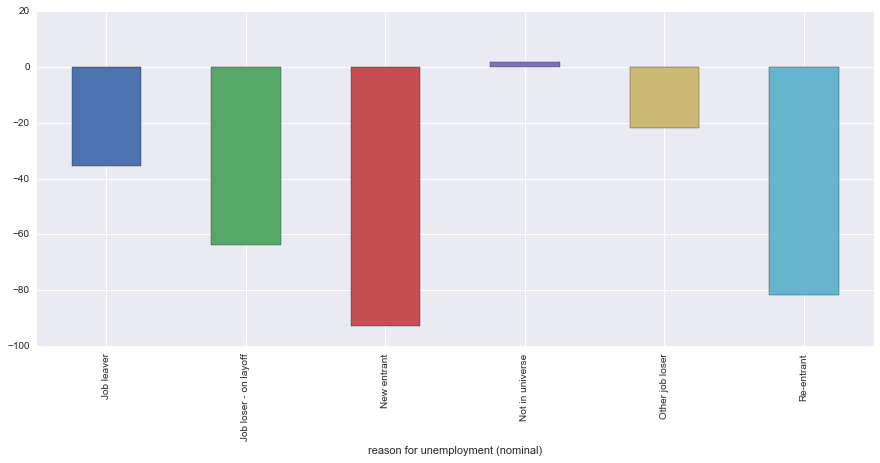

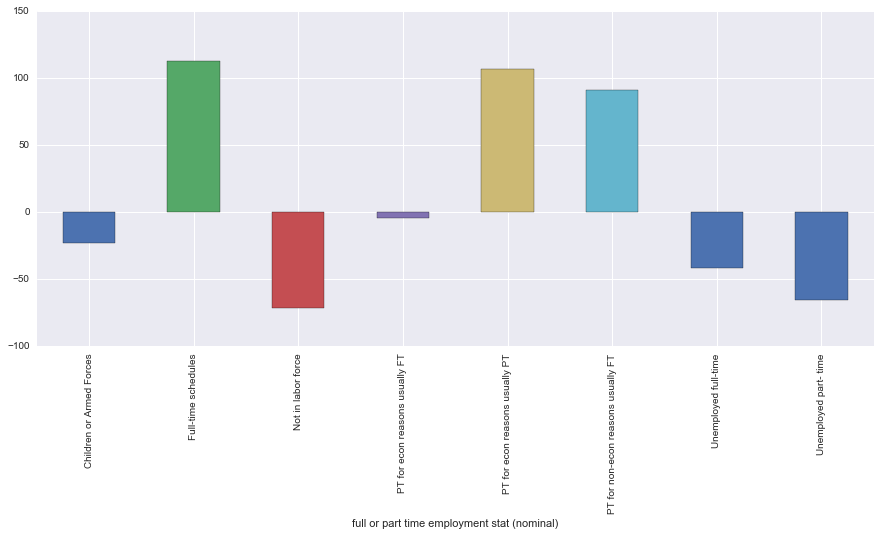

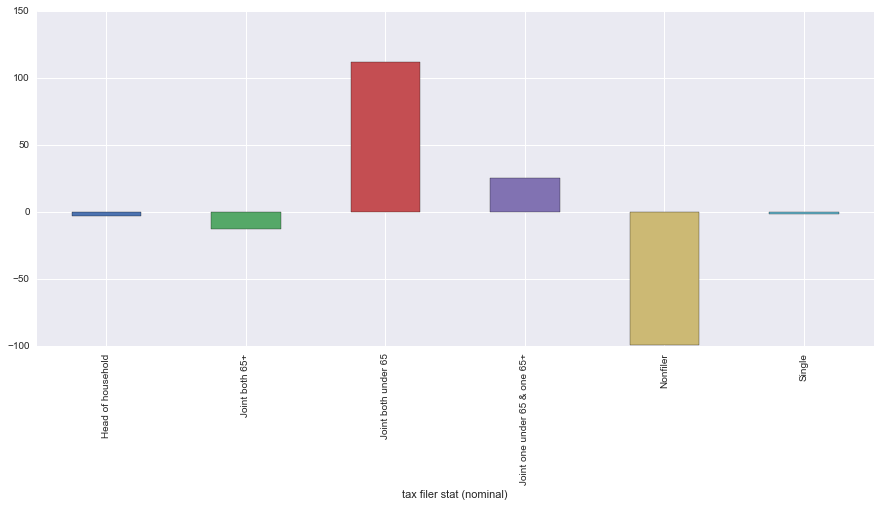

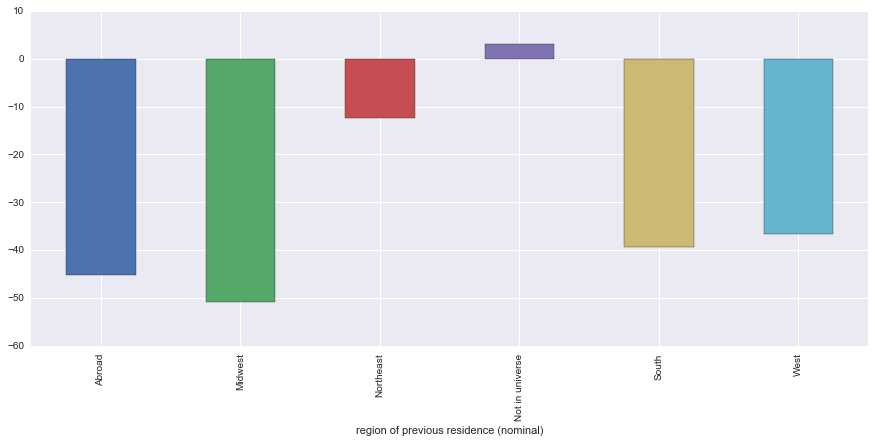

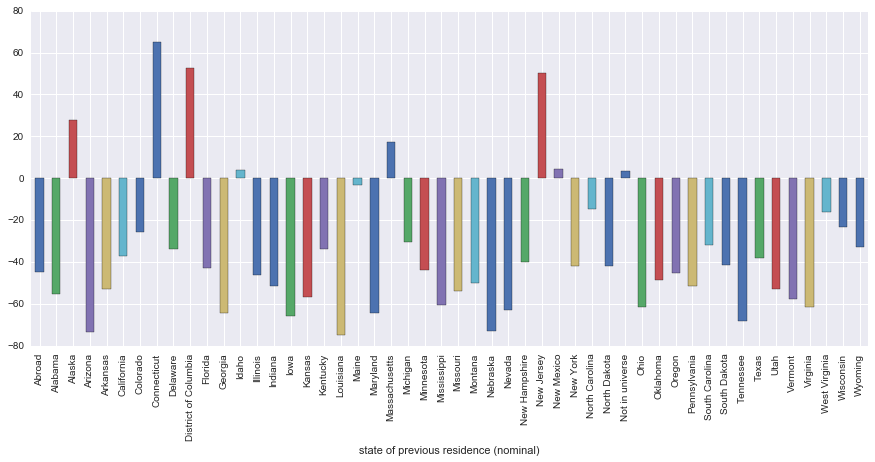

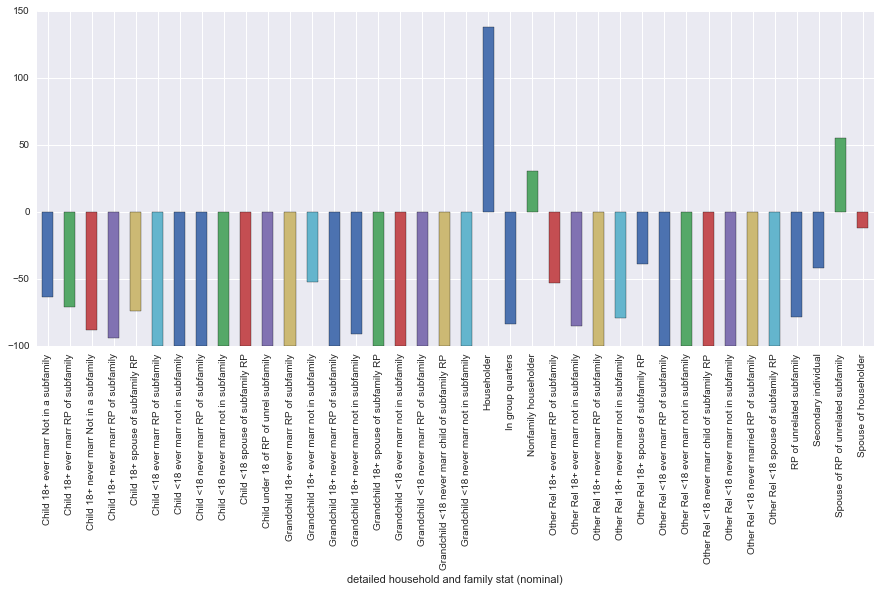

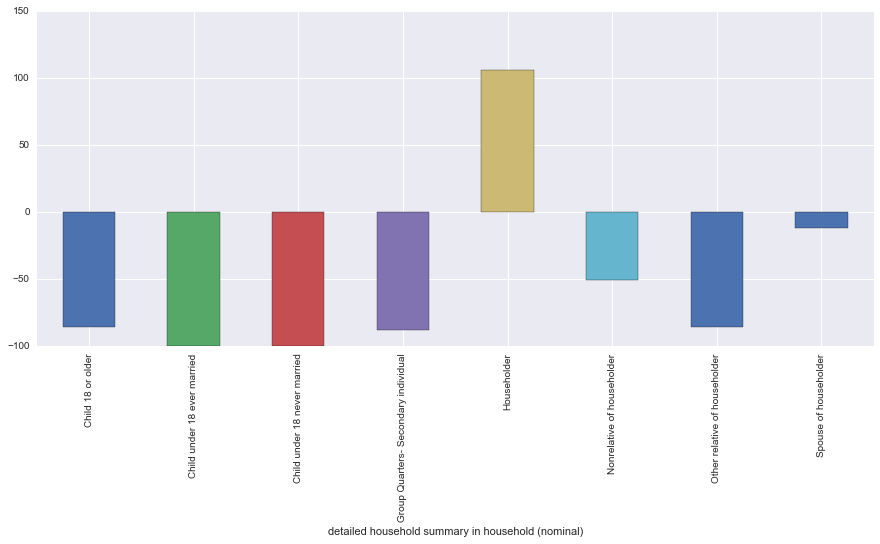

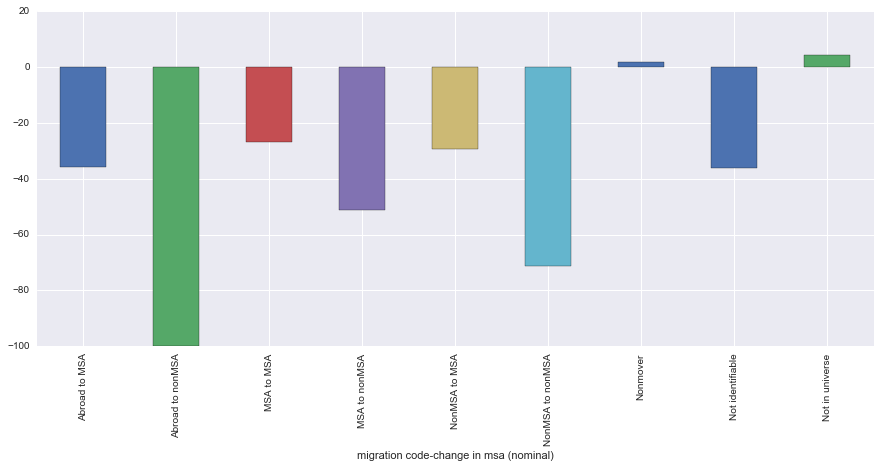

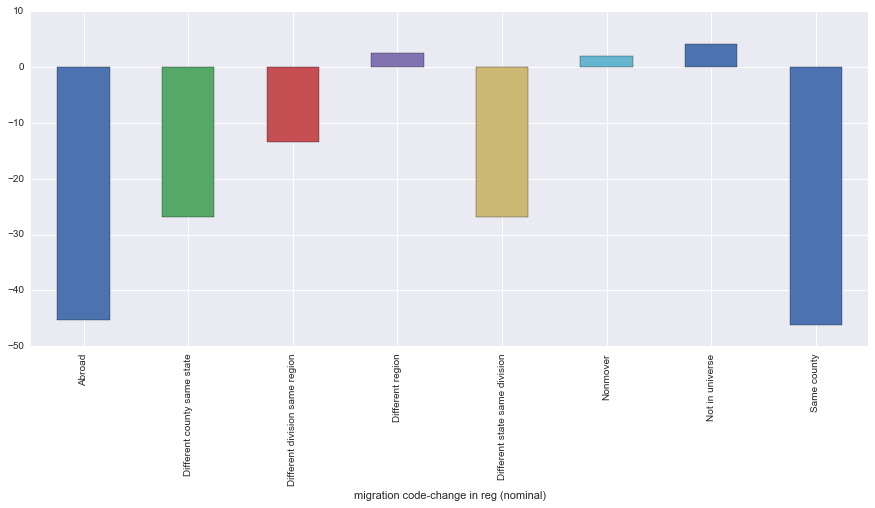

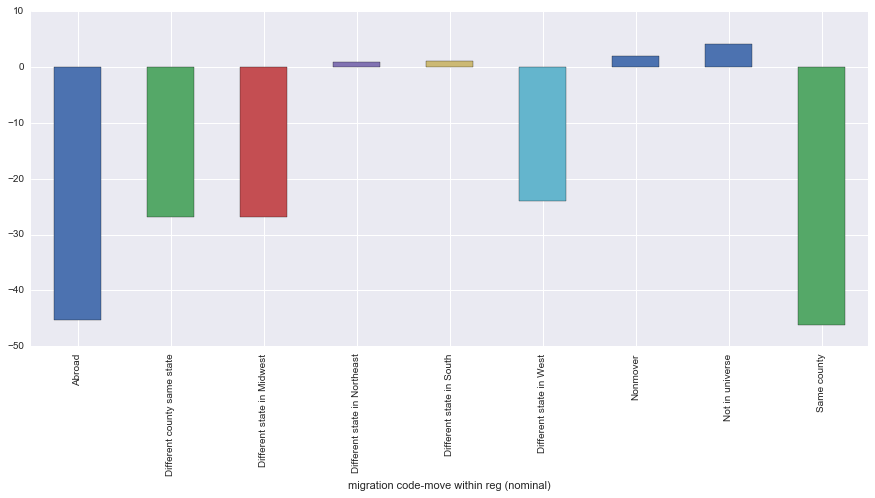

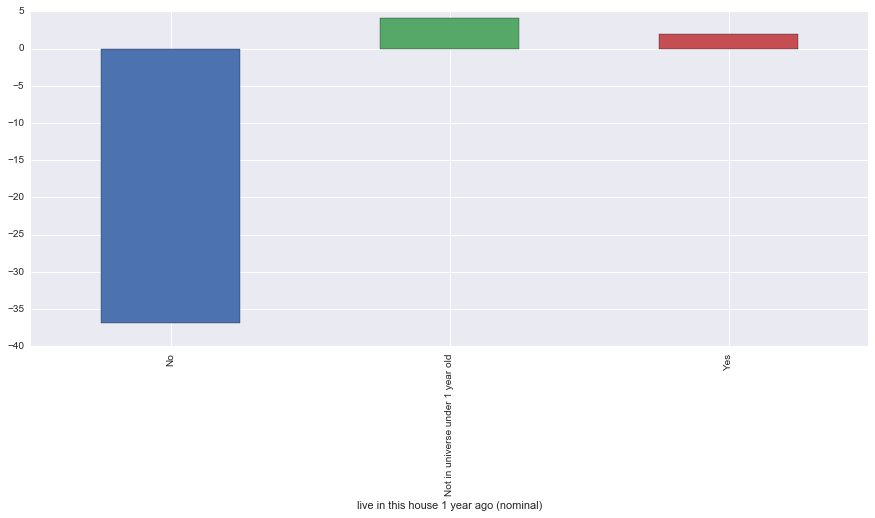

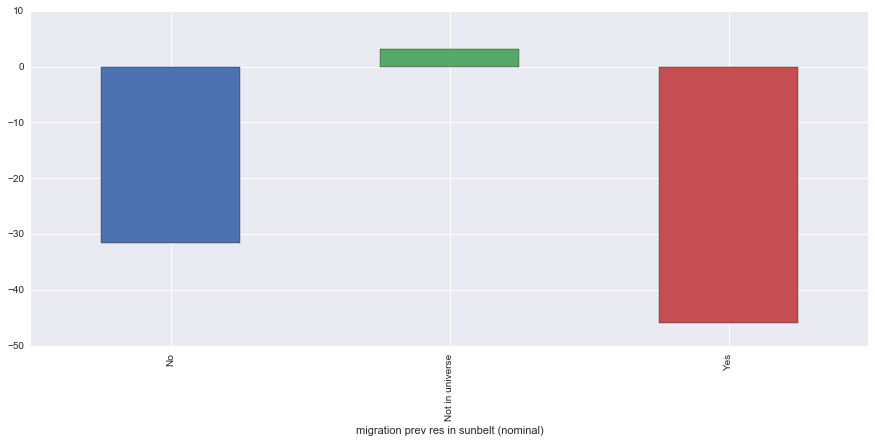

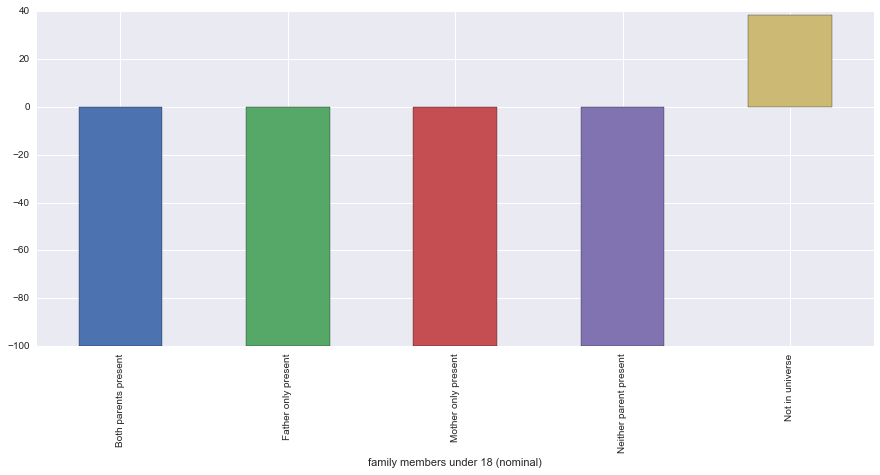

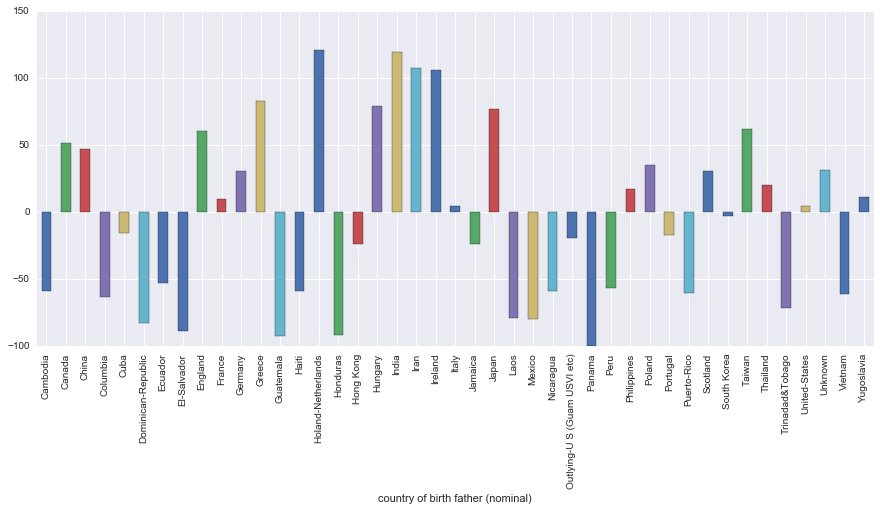

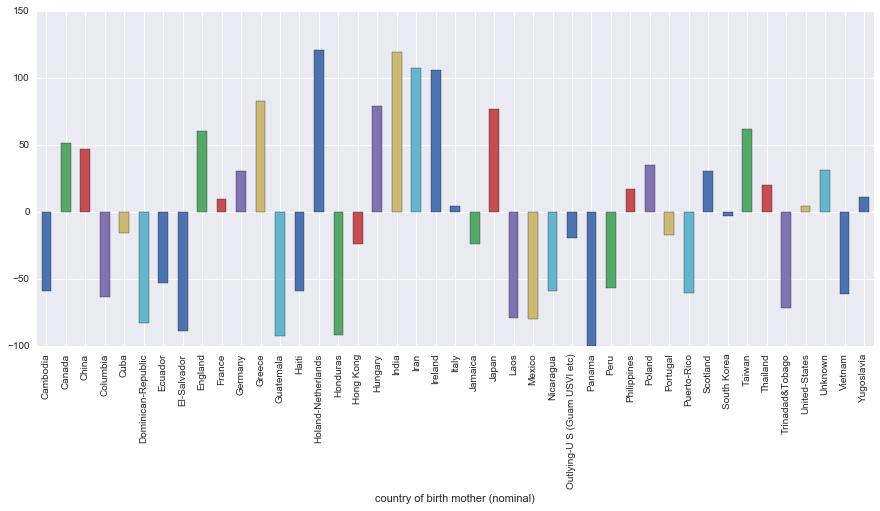

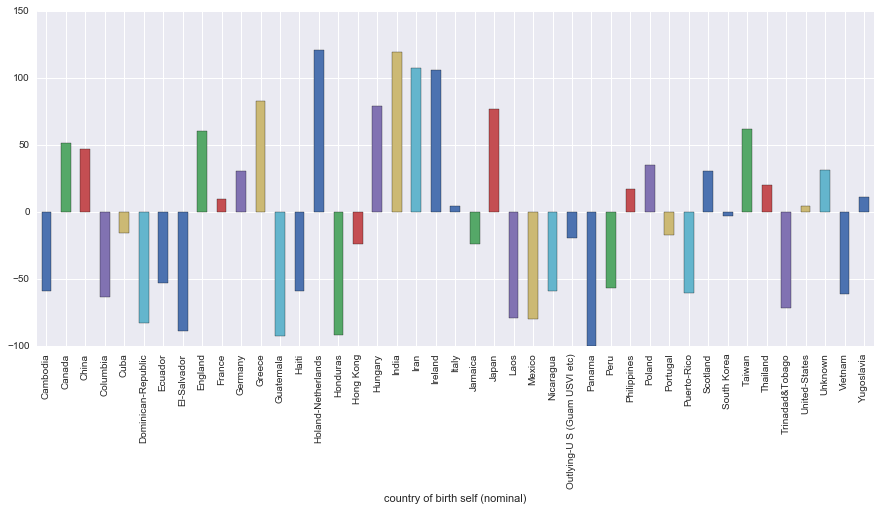

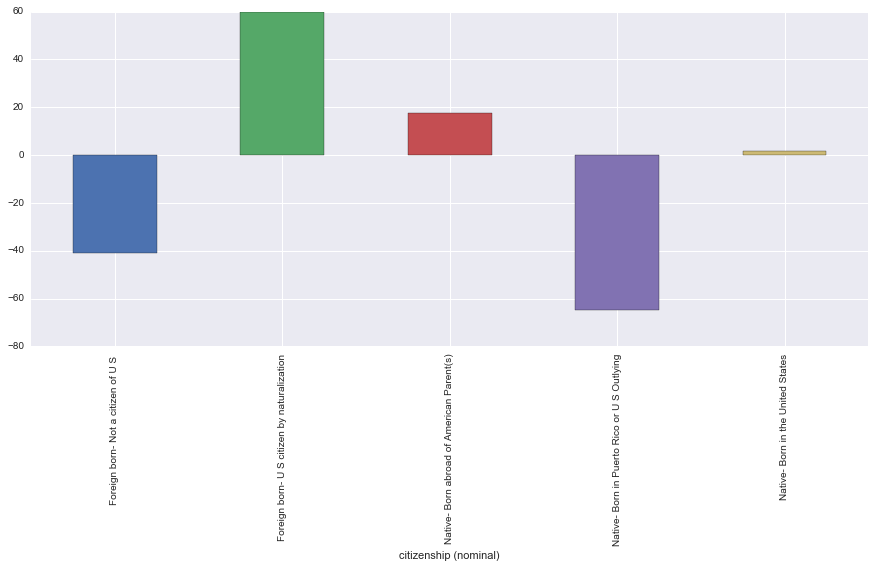

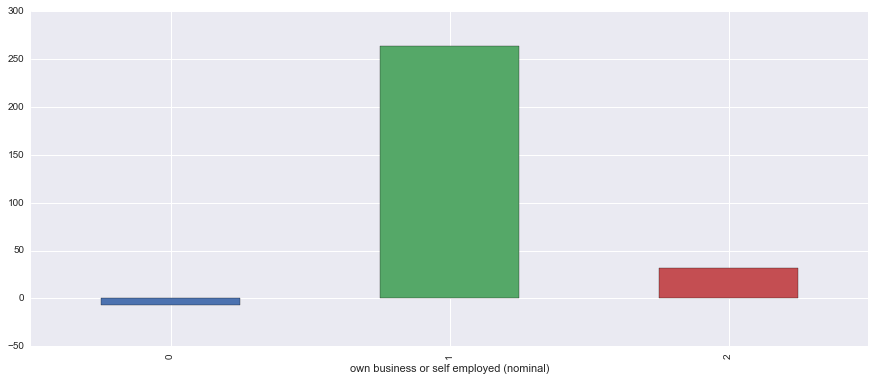

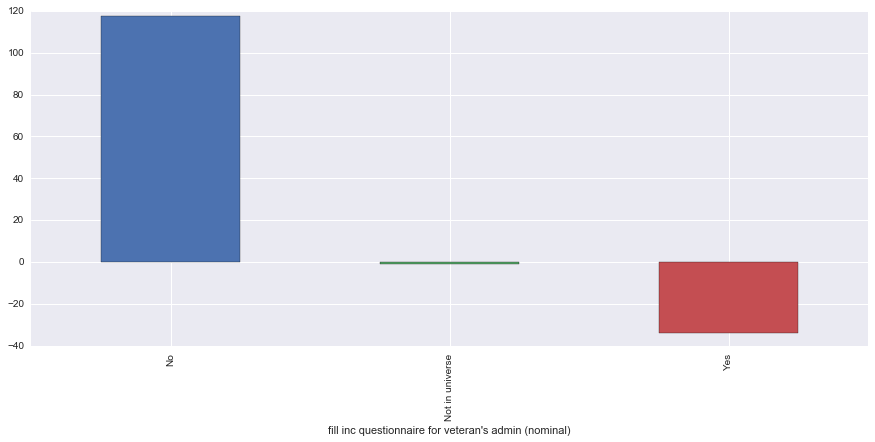

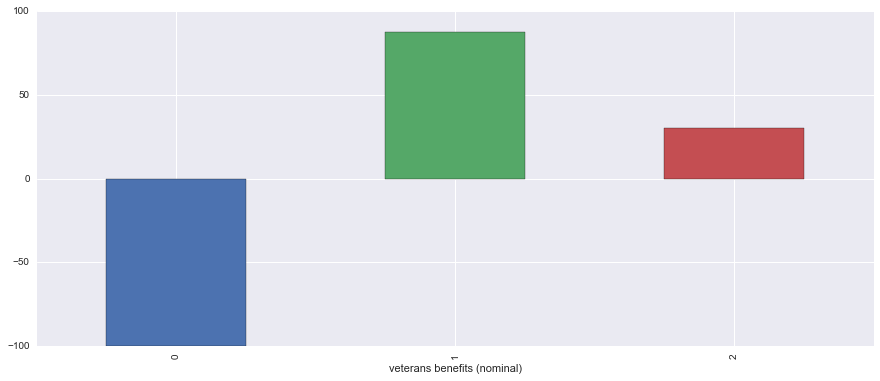

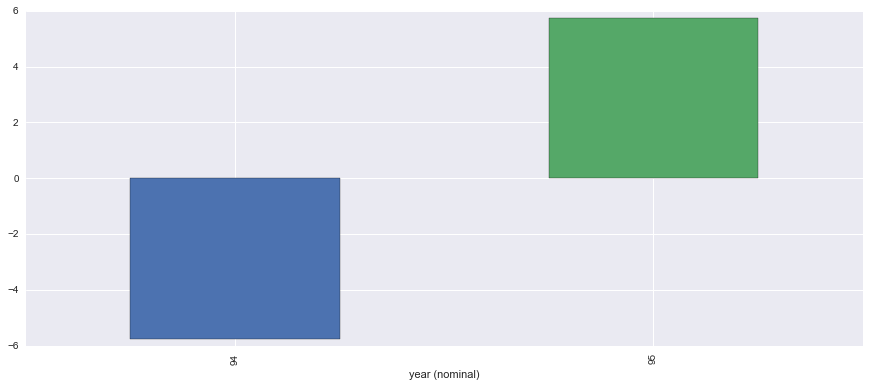

In [25]:
for col in columns_nominal:
    df_train_true = df_train[df_train[target_col]==1][[col]]
    true_ratio = df_train.groupby(target_col).size()[1] / len(df_train) * 100
    
    col_category_total_counts = df_train.groupby(col).size()
    col_category_class_counts = df_train_true.groupby(col).size()

    col_percentage_class = col_category_class_counts / col_category_total_counts * 100

    col_class_influence_percent = col_percentage_class * 100 / true_ratio - 100
    plt.figure(figsize=(15,6))
    col_class_influence_percent.plot(kind='bar')
    plt.show();

Some insights:
- people having doctorate, master, prof school degree are more likely to have income "+50k" as well as not having college or high school education decreases chances to have a high income
- instances of mexican nationality tend to earn less then others
- among other categories householders are the most likely to have higher income
- year categorical variable does not seem to be very useful for our task

We can set a threshold for significance, and the categories for which the significance falls below it, will be called unsignificant.

The following function returns list of the most significant categories for the given data and the threshold. It has additional functionality (of creating new features from significances of categories, similar to target encoding) which will be used during data preprocessing:

In [12]:
def get_additional_significant_features(df, columns_nominal, threshold_importance = 250, return_value='list of important features'):
    
    important_cols = []
    new_features_df = pd.DataFrame(index=df.index)

    for col in columns_nominal:
        df_true = df[df[df.columns[-1]]==1][[col]]
        true_ratio = df.groupby(df.columns[-1]).size()[1] / len(df) * 100

        col_category_total_counts = df.groupby(col).size()
        col_category_class_counts = df_true.groupby(col).size()
        
        col_percentage_class = col_category_class_counts / col_category_total_counts * 100
        col_class_influence_percent = (col_percentage_class * 100 / true_ratio - 100).fillna(0)
        
        if return_value=='list of important features':
            important_cols_names = [col + '_' + str(val) for val in list(col_class_influence_percent[abs(col_class_influence_percent)>threshold_importance].index)]
            important_cols_importances = [val for val in list(col_class_influence_percent[abs(col_class_influence_percent)>threshold_importance])]
            important_cols.extend(important_cols_names)
        
        if return_value=='df of dummies':
            cols_names = list(map(str,list(col_class_influence_percent.index)))
            cols_importances = list(col_class_influence_percent)
            cols_dict = {name: cols_importances[i] for i, name in enumerate(cols_names)}            
            new_features_df[col+'_dummy_import'] = df[col].apply(lambda x: cols_dict[str(x)])                
    
    if return_value=='list of important features':
        return important_cols
    if return_value=='df of dummies':
        return new_features_df

Taking a threshold of 350% the following variables are the most significant:

In [19]:
get_additional_significant_features(df_train, columns_nominal, threshold_importance=350)

['class of worker (nominal)_Self-employed-incorporated',
 'detailed industry recode (nominal)_20',
 'detailed industry recode (nominal)_26',
 'detailed occupation recode (nominal)_2',
 'detailed occupation recode (nominal)_4',
 'detailed occupation recode (nominal)_5',
 'detailed occupation recode (nominal)_6',
 'detailed occupation recode (nominal)_7',
 'detailed occupation recode (nominal)_11',
 'education (nominal)_Doctorate degree(PhD EdD)',
 'education (nominal)_Masters degree(MA MS MEng MEd MSW MBA)',
 'education (nominal)_Prof school degree (MD DDS DVM LLB JD)',
 'major occupation code (nominal)_Executive admin and managerial']

In order to explore influence of threshold on number of features/categories selected, let's plot number of selected features as a function of significance level:

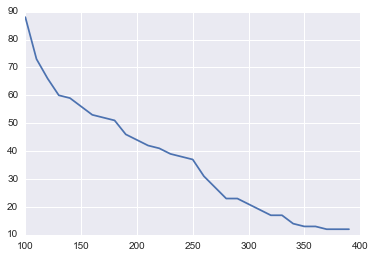

In [27]:
len_array = []
for threshold in range(100,400,10):
    len_array.append(len(get_additional_significant_features(df_train, columns_nominal=columns_nominal, threshold_importance=threshold)))
    
plt.plot(list(range(100,400,10)), len_array);

There isn't any "jump" or any significant change ("elbow"), thus this plot does not seem to be helpful and we will choose number of important features in some other way.

### Intermediate conclusion after data exploration
I would say that education, age, marital status, class of worker and major occupation code variables are the variables most correlated to the imcome level.

# Preprocessing

Now when we have better understanding of the data we have to prepare it for being used by a classification model.

### special treatment for children instances

As we can see the percentage of children under 16 is around 25% (same for test set) and none of them has an income of more than 50k (which sounds logical). From this we can draw a conclusion that we could use only adults as a train set (making the classes a bit less unbalanced) and predict "-50k" class for all of the children in the test case. When making this decision we should also take into account the goal of our predictions - if it is acceptable to have an instance which represents a child with a high income and if it's extremely important to detect it, we should keep children in the training set. Although, considering that among all of the instances of train and test set (199523 and 99762) there are no instances like this, classifier might have issues with detecting such an "outlier".

In our framework we will follow the suggested approach with the described specific treatment if children instances ("hiding" then from the classifier).

### feature selection / engineering

We cannot use categorical features as they are with the classifier. Therefore, I suggest to one-hot encode categorical variables, join them with continuous features. But a huge number of features which might decrease performance of classifier / lead to overfitting, and some of the variables might be noisy and not important. Thus we should consider doing feature selection. There are various approaches possible to do this:
- using feature_importances_ attribute of a fitted tree classifier (Random Forest, for example)
- using the tools which sklearn library provides tools for feature selection like SelectKBest. At the same time we should keep in mind that most of the approaches consider features separately while sometimes some of the them migh be more useful for predictions when taken together.
- one more option that I considered is to select features by selecting those with the significance of more than some threshold (based on the approach describes in the previous section) but apparently features selected by RF worked out a bit better.
- sometimes PCA might be useful for feature selection/dimensionality reduction but it works better with continuous variables as soon as distances are defined better with them.

I did some tests with first three approaches and decided to proceed with the one using RF feature importances.

Based on my experience, having good features is usually more important than well-tuned classifier and adding new useful features might give great increase in performance.

Let's add hand-crafted features to our dataset. These features will contain the significance of the categories for categorical variables (analogical to target encoding). As it will be shown at the model evaluation section, adding these features might improve the score of the model. Although, we have to take care of the trade-off between amount of information added by these new features and high dimentionality might will lead to worse performance. _(For example, tests have shown that when using only 50 features chosen by RF feature importances the score is better than using those 50 together with hand-crafted features, while the opposite is true when using 30 features instead of 50)_

In addition, I tried adding variables created from multiplied 'wage per hour' and 'weeks worked in a year' features and capital gains/losses and dividends features frouped into one with categories positive/negative/neutral additional income. Another possible preprocessing would merge some similar categories in multicategorical variables - education and marital status. 

Concerning not useful variables, we will not drop them, they simply will not be selected.

Let's wrap this approach into a easy-to-use feature extractor class which follows sklearn framework. In the fit method the "important" columns are set, and data frame is transformed in transform method.

(children_threshold_age parameter is an attribute which determines the threshold for age of children)

In [13]:
target_train = df_train['income level']
target_test = df_test['income level']

df_train = df_train.drop(labels='income level', axis=1)
df_test = df_test.drop(labels='income level', axis=1)

Let's define a function which gets training data with labels and desired number of features as input and returns list of selected (by RandomClassifier) features:

In [14]:
def get_important_cols_rf(X, y, columns_continuous, columns_nominal, nb_features=30):
    dummies = pd.DataFrame(index=X.index)
    for col in columns_nominal:
        dummies = dummies.join(pd.get_dummies(X[col], prefix=col, drop_first=False))

    dummies = dummies.join(X[columns_continuous])

    rf_clf = RandomForestClassifier(n_estimators=20, class_weight='balanced')
    rf_clf.fit(dummies, y)
    
    feature_importances_df = pd.DataFrame({'name': dummies.columns, 'importance': rf_clf.feature_importances_})
    feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
    
    return feature_importances_df['name'][:nb_features]

# Some feature engineering
- additional income variables:

In [15]:
def add_add_income_feat(df):
    add_income_feat = df['capital gains (continuous)']-df['capital losses (continuous)']+df['dividends from stocks (continuous)']
    add_income_feat = add_income_feat.apply(lambda x:'neg'*(x<0) + 'pos'*(x>0) + 'zero'*(x==0))
    add_income_feat.name='add income'
    add_income_feat = add_income_feat.astype('category')
    df = df.join(add_income_feat)
    return df

def add_est_income_feat(df):
    est_income_feat = df['wage per hour (continuous)']*df['weeks worked in year (continuous)']
    est_income_feat.name='est income'
    df = df.join(est_income_feat)
    return df

df_train = add_add_income_feat(df_train)
df_train = add_est_income_feat(df_train)
df_test = add_add_income_feat(df_test)
df_test = add_est_income_feat(df_test)

- merging some categories in 'education' and 'marital status' variables:

In [16]:
def regroup_categories(df):
    df['education (nominal)'].replace(
        ['Less than 1st grade','10th grade','11th grade', '12th grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade', '7th and 8th grade', '9th grade'], 
        'Left school studies',inplace=True)
    df['education (nominal)'].replace(
        ['Associates degree-academic program','Associates degree-occup /vocational'], 
        'Associates',inplace=True)

    df['marital stat (nominal)'].replace(['Never-married','Married-spouse absent'], 'NotMarried',inplace=True)
    df['marital stat (nominal)'].replace(['Married-A F spouse present','Married-civilian spouse present'], 'Married',inplace=True)
    df['marital stat (nominal)'].replace(['Separated','Divorced'], 'Separated',inplace=True)
    df['marital stat (nominal)'].replace(['Widowed'], 'Widowed',inplace=True)
    
    df['education (nominal)'] = df['education (nominal)'].astype('category')
    df['marital stat (nominal)'] = df['marital stat (nominal)'].astype('category')
    
    return df

df_train = regroup_categories(df_train)
df_test = regroup_categories(df_test)

## Feature extractor class

In [17]:
CHILDREN_AGE_THRESHOLD = 16

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

class FeatureExtractor():
    def __init__(self, children_threshold_age=CHILDREN_AGE_THRESHOLD, verbose=False, add_features=True):
        self.children_threshold_age = children_threshold_age
        self.verbose = verbose
        self.add_features = add_features

    def fit(self, X_df, y):
        self.columns_continuous = [col for col in X_df.columns if 'continuous' in col]
        self.columns_nominal = [col for col in X_df.columns if 'nominal' in col]
        
        self.important_cols = get_important_cols_rf(X_df, y, self.columns_continuous, self.columns_nominal, nb_features=30)        
        if self.verbose:
            print('fitted')
        return self
        
    def transform(self, X_df, y):        
        dummies = pd.DataFrame(index=X_df.index)
        for col in self.columns_nominal:
            dummies = dummies.join(pd.get_dummies(X_df[col], prefix=col, drop_first=False))
        dummies = dummies.join(X_df[self.columns_continuous])
        dummies = dummies[self.important_cols]
        
        if self.add_features:
            dummies_importance_df = get_additional_significant_features(X_df[self.columns_nominal].join(y), self.columns_nominal, return_value='df of dummies')
            dummies = dummies.join(dummies_importance_df)
    
        if self.verbose:
            print('transformed')
        return dummies, y
    
    def fit_transform(self, X_df, y):
        self.fit(X_df, y)
        return self.transform(X_df, y)

Let's fit our feature extractor and transform train and test sets with/without hand-crafted features:

In [19]:
# not using significances of categories as features

feat_extr_orig_feat = FeatureExtractor(add_features=False)

X_train_orig_feat, y_train_orig_feat = feat_extr_orig_feat.fit_transform(df_train, target_train)
print(X_train_orig_feat.shape, y_train_orig_feat.shape)

X_test_orig_feat, y_test_orig_feat = feat_extr_orig_feat.transform(df_test, target_test)
print(X_test_orig_feat.shape, y_test_orig_feat.shape)

(199523, 30) (199523,)
(99762, 30) (99762,)


In [18]:
# using significances of categories as features

feat_extr = FeatureExtractor(add_features=True)

X_train, y_train = feat_extr.fit_transform(df_train, target_train)
print(X_train.shape, y_train.shape)

X_test, y_test = feat_extr.transform(df_test, target_test)
print(X_test.shape, y_test.shape)

(199523, 63) (199523,)
(99762, 63) (99762,)


## Imbalanced classes issue

Before building a model we have to deal with the problem of highly imbalaced classes. There are several approaches:
- over/under-sampling of data
- metric choice is crucial (choice of metric is explained in the next section)
- parameters of classifier (usually "class_weight" in sklearn classifiers) - we will use this.
- look at the problem from other point of view - as soon as we have a problem of binary classification where one of the classes is much less frequent, we could consider it as a problem of anomaly detection or one class classifiction.

### choice of metric

Classical accuracy score will work badly in our framework as soon as there are many more instances of "0" class and the classifier will tend to predict them better while being weaker in recognizing minor class "1" instances (but accuracy will not represent it very well), which will lead to a good accuracy score having a poor model.

It is adviced to use precision and recall to focus on small positive class — when the positive class is smaller and the ability to detect correctly positive samples is our main focus we should use precision and recall. F1 score is a metric which takes into account both of them (being a harmonic mean of them). So, we will stick to F1 score when evaluation and model comparison.

Not to mention, choice of a metric should also depend on use case and priorities that we have - which mistakes are acceptable and which ones are very important to avoid.

# Classification

We should always keep in mind that different classifiers work differently for different data so it's better to test various models and not stick to the only one while testing.
We will consider RandomForest classifier (because trees are supposed to work well with high dimensional data and with imbalanced data as soon as they build separation between classes, and ensemble of trees is a good way to decrease the variance and improve quality of predictions).

Second model to consider is Logistic Regression because it is very natural to apply it for binary classification task. One detail, as soon as classes are imbalanced, I've changed the threshold from 0.5 to 0.2 (this is the threshold of deciding whether the instance is of "+50k" class). Normally, value of this threshold should be chosen after doing some more tests. Now I have compared the performance of the model with several values of it and decided to keep this one for now.

Another classifier that I wanted to test is SVM classifier, but it is working too slow for this amount of variables. Although it might be harder to separate classses of highly dimentional data with a hyperplane, SVM still might perform well on our data. One additional preprocessing that we have to apply to our data with this approach is scaling, so for continuous variables we will apply standart scaling (removing mean and division by variance).

We'll put "class_weight" parameters to 'balanced' in order to take into account frequencies of the classes.

Concerning imbalanced classes issue with other classifiers, there are different approaches to tackle this problem. For example, with Logistic Regression we could change the threshold from 0.5 to a custom value.

Considering that we have specific treatment for children, let's wrap sklearn classifiers into our custom classifier (which still fits into sklearn framework).

### Custom classifier

In [126]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import f1_score

class CustomClassifier(BaseEstimator):
    def __init__(self, clf=RandomForestClassifier(), children_threshold_age=CHILDREN_AGE_THRESHOLD, verbose=False, scale_features=False):
        self.clf = clf
        self.children_threshold_age = children_threshold_age
        self.verbose = verbose
        self.scale_features = scale_features

    def fit(self, X, y):
        _, _ = check_X_y(X, y)
                
        idx_child= X[X['age (continuous)'] <= self.children_threshold_age].index
        idx_adult = X[X['age (continuous)'] > self.children_threshold_age].index
        
        if self.scale_features:
            self.scalar = StandardScaler()
            self.columns_continuous = [col for col in columns if 'continuous' in col]
            X.loc[:,self.columns_continuous] = self.scalar.fit_transform(X[self.columns_continuous])
        
        self.X, self.y = X.loc[idx_adult,:].values, y[idx_adult].values
        self.X_child, self.y_child= X.loc[idx_child,:].values, y[idx_child].values
        
        self.clf.fit(self.X, self.y)
        if self.verbose:
            print('fitted')
        return self

    def predict(self, X_orig):
        if isinstance(self.clf, LogisticRegression):
            proba = self.predict_proba(X_orig)
            return (proba.T[1]>0.2).astype(int)
            
        else:
            check_is_fitted(self, ['X', 'y'])

            X = X_orig.copy()

            idx_child= X[X['age (continuous)'] <= self.children_threshold_age].index
            idx_adult = X[X['age (continuous)'] > self.children_threshold_age].index

            if self.scale_features:
                X.loc[:,self.columns_continuous] = self.scalar.transform(X.loc[:,self.columns_continuous])

            X = X.loc[idx_adult,:]

            y_adult = self.clf.predict(X)
            y_adult_df = pd.DataFrame(y_adult, index=idx_adult, columns=['y'])

            y_child= np.zeros(len(idx_child))
            y_child_df = pd.DataFrame(y_child, index=idx_child, columns=['y'])

            y_df = pd.concat([y_adult_df, y_child_df])
            predicted = X_orig.join(y_df)['y'].values

            return predicted

    def predict_proba(self, X_orig):
        check_is_fitted(self, ['X', 'y'])
        
        X = X_orig.copy()
            
        idx_child= X[X['age (continuous)'] <= self.children_threshold_age].index
        idx_adult = X[X['age (continuous)'] > self.children_threshold_age].index
        
        if self.scale_features:
            X.loc[:,self.columns_continuous] = self.scalar.transform(X.loc[:,self.columns_continuous])
                
        X = X.loc[idx_adult,:]
        
        y_adult = self.clf.predict_proba(X)#.T #.T[1]
        y_adult_df = pd.DataFrame(y_adult, index=idx_adult, columns=['y0','y1'])
        
        y_child= np.array([np.ones(len(idx_child)),np.zeros((len(idx_child)))]).T
        y_child_df = pd.DataFrame(y_child, index=idx_child, columns=['y0','y1'])
        
        y_df = pd.concat([y_adult_df, y_child_df])
        predicted_proba = X_orig.join(y_df)[['y0','y1']].values
        
        return predicted_proba
    
    def score(self, X, y):
        _,_ = check_X_y(X, y, )
        check_is_fitted(self, ['X', 'y'])
        
        y_pred = self.predict(X)
        return f1_score(y_true=y, y_pred=y_pred)

### Intermediate model evaluation

In order to evaluate and compare the models (while we can only use train set) we will use cross validation which splits train dataset into train/test several times, trains on smaller train dataset and evaluates it's performance on the smaller test set. After several iteration we will average these scores and consider the result as the score of our model.

Here we should take care about the threshold of amount of data in smaller train and test sets as soon as model will learn better if it has more data to train on but at the same time train set will be smaller and thus scores for multiple iterations will have higher variation.

We will run 3 iterations for each model, putting 30% of data to a test case (70% / 30% is one of the ratios that is known to be working well).

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

### using RandomForest

In [61]:
rf_orig_feat = CustomClassifier(clf=RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=15))
scores = cross_val_score(estimator=rf_orig_feat, X=X_train_orig_feat, y=y_train_orig_feat, cv=cv)

print('F1 score = ', scores.mean())

F1 score =  0.45737292240330957


In [62]:
rf = CustomClassifier(RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=15))
scores = cross_val_score(rf, X_train, y_train, cv=cv)

print('F1 score = ', scores.mean())

F1 score =  0.5003313327317485


As well in this case with this set of parameters we can see that using crafted features improved the score of our model.

Further improvements that might be done here are:
- tuning number of features selected with RF feature importance (we have to keep in mind that too many features will lead to overfitting while taking too few of them will result into underfitting)
- we can tune hyperparameters of the RF classifier - number of estimators and others. RandomSearch or GridSearch are good tools for this.

### using Logistic Regression

In [133]:
logreg = CustomClassifier(LogisticRegression())
scores = cross_val_score(logreg, X_train, y_train, cv=cv)

print('F1 score on test set = ', scores.mean())

F1 score on test set =  0.5521203812484335


### using SVM  classifier
( takes too long to run )

In [ ]:
# svm = CustomClassifier(SVC(class_weight='balanced'))
# scores = cross_val_score(svm, X_train, y_train, cv=cv)

# print('F1 score on test set = ', svm.score(X_test, y_test))

Here to improve performance of the model we should tune parameters, mainly kernel, C - penalization and gamma/degree in the case of non-linear kernel.

# Evaluation

As we have seen from cross validation, Logistic Regression gives better score, therefore we will consider it as a best model. Nevertheless, let's evaluate both of them using the test set (with additional variables).

## Logistic Regression

In [136]:
logreg = CustomClassifier(LogisticRegression())
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

print('F1 score on the test set = ', f1_score(y_pred=predictions, y_true=y_test))

F1 score on the test set =  0.5569522832221652


## Random Forest

In [65]:
rf = CustomClassifier(RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=15))
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

print('F1 score on the test set = ', f1_score(y_pred=predictions, y_true=y_test))

F1 score on the test set =  0.4958537103976185


### overfitting
If we see that the score while training is higher than the one during testing, usually it indicates that the model is a bit overfitting. In general the approaches to solve this problem are:
- select features more carefully (in order to reduce model complexity)
- use cross-validation for model selection
- for a tree-model case, prunning a decision tree might help
- with SVM we could tune penalty parameter

Let's as well consider different evalution metrics:

### Random Forest

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictions = rf.predict(X_test)

print('Accuracy = ', accuracy_score(y_pred=predictions, y_true=y_test))

print('Precision = ', precision_score(y_pred=predictions, y_true=y_test))
print('Recall = ', recall_score(y_pred=predictions, y_true=y_test))

Accuracy =  0.9524668711533449
Precision =  0.724223602484472
Recall =  0.37698027804720335


And the confusion matrix of the model:

In [67]:
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,92688,888,93576
1,3854,2332,6186
All,96542,3220,99762


We can see from here that accuracy is very high but it doesn't mean that the model is performing very well. It happened because classes were very imbalanced and classifier learned better to predict instances of the "0" class (="-50k") and thus is making more mistakes for "1" class (="+50k") items. But as soon as "0" class is more frequent, we have more true negatives (from class "0") and less false positives (from "1" class).

In order to see the real situation we can look at precision and recall metrics which are more informative for us.
We can see that precision is not bad but recall is very low. Explanation to why it has happened is that precision measures the probability of a sample classified as positive to actually be positive - we don't have too many instances wrongly classified as "1", that's why precision is not too low.
Recall estimates how many of "1" class instances were classified as of class "1". In our case only 38% of class "1" instances were classified correctly (which is also visible from the covariance matrix - model has been mistaken on 3854 positive items out of 6186 items).

Not to mention, this example is a good illustration of the importance of an appropriate choice of metric.

### Logistic Regression

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictions = logreg.predict(X_test)

print('Accuracy = ', accuracy_score(y_pred=predictions, y_true=y_test))

print('Precision = ', precision_score(y_pred=predictions, y_true=y_test))
print('Recall = ', recall_score(y_pred=predictions, y_true=y_test))

Accuracy =  0.93075519736974
Precision =  0.46162024239846905
Recall =  0.701907533139347


In [138]:
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,88512,5064,93576
1,1844,4342,6186
All,90356,9406,99762


Here situation is opposite - precision is low and recall is better because more elements from class "-50k" were classified as positive (class "+50k"). The reason for this is probably not very accurate choice of the threshold for probabilities.

### Challenging part
Talking about the most challenging part for me, it is finding the best trade-off between number of features and information they contribute and model complexity and overfitting. There is a huge space of combinations to test to get the best model, so this issue demands some specific approach.